### Convolution 과 correlation 의 이해
1. convolution : 특징을 나타내기 위해 사용
2. correlation : 관계를 설명하기 위해 사용

In [115]:
# 1차원 컨볼루션 
np.convolve([1, 2, 3], [0, 1, 0.5],'full')

array([ 0. ,  1. ,  2.5,  4. ,  1.5])

In [143]:
# 2차원 컨볼루션
import numpy as np
from scipy import signal

x = np.array([[1, 1, 1, 0, 0],
              [0, 1, 1, 1, 0],
              [0, 0, 1, 1, 1],
              [0, 0, 1, 1, 0],
              [0, 1, 1, 0, 0]],
                dtype='float')
    
kernel_before = np.array([[0, 0, 1],
                          [0, 1, 0],
                          [1, 0, 1],],
                          dtype='float')

print('before flip of kernel :\n', kernel_before)
# x flip , y flip    
kernel_after = np.rot90(kernel_before, 2)
print('after flip of kernel :\n',kernel_after)

print('x shape :',x.shape, 'kernel shape :',kernel_before.shape)

#flip 되어서 들어감.
convolution = signal.convolve2d(x, kernel_before, 'valid')
    
print('convolution : \n',convolution)


before flip of kernel :
 [[ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 1.  0.  1.]]
after flip of kernel :
 [[ 1.  0.  1.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]]
x shape : (5, 5) kernel shape : (3, 3)
convolution : 
 [[ 3.  2.  3.]
 [ 1.  3.  3.]
 [ 1.  3.  4.]]


In [116]:
# 1차원 correlation
np.correlate([1,2,3],[0,0,1],'full')

array([1, 2, 3, 0, 0])

In [145]:
# 2차원 correlation
import numpy as np
from scipy import signal

x = np.array([[1, 1, 1, 0, 0],
              [0, 1, 1, 1, 0],
              [0, 0, 1, 1, 1],
              [0, 0, 1, 1, 0],
              [0, 1, 1, 0, 0]],
                dtype='float')
    
kernel_before = np.array([[0, 0, 1],
                          [0, 1, 0],
                          [1, 0, 1],],
                          dtype='float')

print('before flip of kernel :\n', kernel_before)
# x flip , y flip    
kernel_after = np.rot90(kernel_before, 2)
print('after flip of kernel :\n',kernel_after)

print('x shape :',x.shape, 'kernel shape :',kernel_before.shape)

#flip 하지 않고 계산됨.
correlation = signal.correlate2d(x, kernel_before, 'valid')
    
print('correlation : \n',correlation)

before flip of kernel :
 [[ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 1.  0.  1.]]
after flip of kernel :
 [[ 1.  0.  1.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]]
x shape : (5, 5) kernel shape : (3, 3)
correlation : 
 [[ 3.  2.  3.]
 [ 2.  3.  2.]
 [ 2.  3.  3.]]


### 이미지에서의 convolution 과 correlation

before flip of kernel :
 [[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
after flip of kernel :
 [[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]
x shape : (225, 225) kernel shape : (3, 3)
convolution : 
 [[  60.   53.   13. ...,    8.    3.    4.]
 [  94.   64.  -12. ...,    4.    0.    7.]
 [ 112.   63.  -37. ...,    0.   -3.    7.]
 ..., 
 [  23.   28.   26. ...,    1.   30.   40.]
 [   1.    8.   19. ...,    3.   31.   34.]
 [ -11.   -2.   17. ...,    5.   27.   28.]]


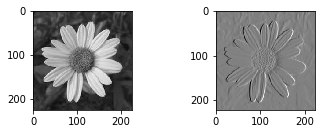

In [196]:
import numpy as np
import tensorflow as tf
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt

image = imread('flower.jpeg')

# RGB 이미지 -> Grayscale 이미지 변환식 : Y = 0.299*R + 0.587*G + 0.114*B
gray_image =0.299*image[:,:,0] + 0.587*image[:,:,1] + 0.114*image[:,:,2] 

# Sobel filter(윤곽선 검출 필터)
kernel_before = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1],],
                          dtype='float')

print('before flip of kernel :\n', kernel_before)
# x flip , y flip    
kernel_after = np.rot90(kernel_before, 2)
print('after flip of kernel :\n',kernel_after)

print('x shape :',gray_image.shape, 'kernel shape :',kernel_before.shape)

#flip 되어 계산됨.
convolution = signal.convolve2d(gray_image, kernel_before, 'valid')
    
print('convolution : \n',convolution)


fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(image,cmap='gray')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(convolution,cmap='gray')


(225, 225)


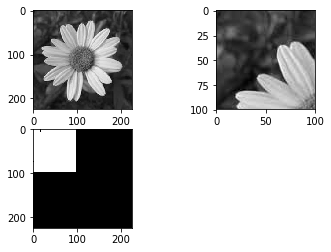

In [17]:
from skimage import io, feature
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def correlation_coefficient(patch1, patch2):
    product = np.mean((patch1 - patch1.mean()) * (patch2 - patch2.mean()))
    stds = patch1.std() * patch2.std()
    if stds == 0:
        return 0
    else:
        product /= stds
        # patch image 와 맞는 부분은 1로 return
        return product

im = io.imread('flower.jpeg', as_grey=True)
print(im.shape)

im1 = im[0:100, 0:100]

# image 사이즈와 동일한 ze
correlation = np.zeros_like(im)

for i in range(1, 98):
    for j in range(1, 98):
        correlation[i, j] = correlation_coefficient(im[i - 1: i + 1 + 1,
                                                        j - 1: j + 1 + 1],
                                                    im1[i - 1: i + 1 + 1,
                                                        j - 1: j + 1 + 1])

        
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(im,cmap='gray')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(im1,cmap='gray')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(correlation,cmap='gray')

# io.imshow(correlation, cmap='gray')
# io.show()

In [2]:
currimg = imread('./test1.jpeg')
np.shape(currimg)

(224, 224, 3)

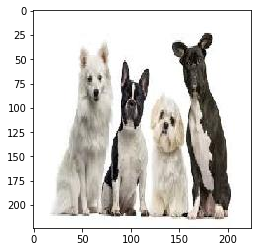

In [3]:
plt.imshow(currimg)

In [4]:
def getActivations(layer,stimuli):
    units = sess.run(layer,feed_dict={X:np.reshape(currimg,[-1,150528])})
    plotNNFilter(units)
def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 4
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest")

In [5]:
# X placeholder
X = tf.placeholder(tf.float32, [None, 224*224*3])
# image reshape
X_img = tf.reshape(X, [-1, 224, 224, 3]) 

In [34]:
def conv2d_transpose_strided(x, W, b, output_shape=None, stride = 2):
    # print x.get_shape()
    # print W.get_shape()
    if output_shape is None:
        output_shape = x.get_shape().as_list()
        output_shape[1] *= 2
        output_shape[2] *= 2
        output_shape[3] = W.get_shape().as_list()[2]
    print('output_shape:',output_shape)
    conv = tf.nn.conv2d_transpose(x, W, output_shape, strides=[1, stride, stride, 1], padding="SAME")
    return tf.nn.bias_add(conv, b)

In [33]:
#conv_1
weight_1 = tf.Variable(tf.random_normal([3, 3, 3, 24], stddev=0.01))
conv_1 = tf.nn.conv2d(X_img, weight_1, strides=[1, 1, 1, 1], padding='VALID')
print(conv_1)

#conv_2
weight_2 = tf.Variable(tf.random_normal([3, 3, 24, 24], stddev=0.01))
conv_2 = tf.nn.conv2d(conv_1, weight_2, strides=[1, 3, 3, 1], padding='SAME')
print(conv_2)

#conv_3
weight_3 = tf.Variable(tf.random_normal([3, 3, 24, 24], stddev=0.01))
conv_3 = tf.nn.conv2d(conv_2, weight_3, strides=[1, 2, 2, 1], padding='SAME')
print(conv_3)

#conv_4
weight_4= tf.Variable(tf.random_normal([3, 3, 24, 24], stddev=0.01))
conv_4= tf.nn.conv2d(conv_3, weight_4, strides=[1, 2, 2, 1], padding='SAME')
print(conv_4)

#conv_5
weight_5= tf.Variable(tf.random_normal([3, 3, 24, 24], stddev=0.01))
conv_5= tf.nn.conv2d(conv_4, weight_5, strides=[1, 2, 2, 1], padding='SAME')
print(conv_5)

#conv_6
weight_6= tf.Variable(tf.random_normal([3, 3, 24, 24], stddev=0.01))
conv_6= tf.nn.conv2d(conv_5, weight_6, strides=[1, 2, 2, 1], padding='SAME')
print(conv_6)

#conv_7
weight_7 = tf.Variable(tf.random_normal([1,1,24,512]))
b7 = tf.Variable([512])
conv_7 = tf.nn.conv2d(conv_6,weight_7,strides=[1,1,1,1],padding='SAME')
print(conv_7)

#conv_8
weight_8 = tf.Variable(tf.random_normal([1,1,512,4]))
b8 = tf.Variable([4])
conv_8 = tf.nn.conv2d(conv_7,weight_8,strides=[1,1,1,1],padding='SAME')
print(conv_8)


        W_t1 = utils.weight_variable([4, 4, deconv_shape1[3].value, NUM_OF_CLASSESS], name="W_t1")

        b_t1 = utils.bias_variable([deconv_shape1[3].value], name="b_t1")
        conv_t1 = utils.conv2d_transpose_strided(conv8, W_t1, b_t1, output_shape=tf.shape(image_net["pool4"]))

        fuse_1 = tf.add(conv_t1, image_net["pool4"], name="fuse_1")


Tensor("Conv2D_199:0", shape=(?, 222, 222, 24), dtype=float32)
Tensor("Conv2D_200:0", shape=(?, 74, 74, 24), dtype=float32)
Tensor("Conv2D_201:0", shape=(?, 37, 37, 24), dtype=float32)
Tensor("Conv2D_202:0", shape=(?, 19, 19, 24), dtype=float32)
Tensor("Conv2D_203:0", shape=(?, 10, 10, 24), dtype=float32)
Tensor("Conv2D_204:0", shape=(?, 5, 5, 24), dtype=float32)
Tensor("Conv2D_205:0", shape=(?, 5, 5, 512), dtype=float32)
Tensor("Conv2D_206:0", shape=(?, 5, 5, 4), dtype=float32)
W_t1 shape: <tf.Variable 'Variable_264:0' shape=(2, 2, 512, 4) dtype=float32_ref>


ValueError: output_shape must have shape (4,), got (1,)

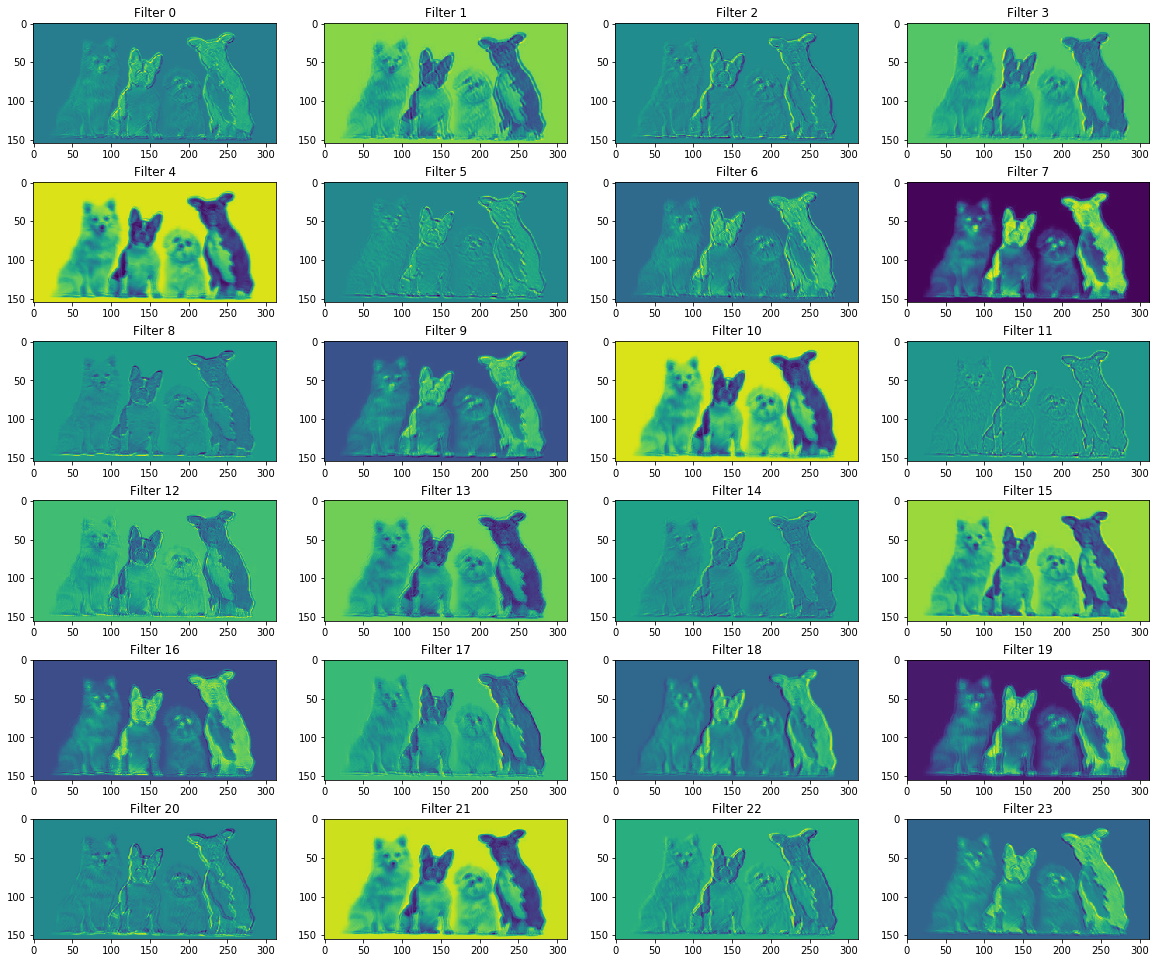

In [7]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
getActivations(conv_1,currimg)

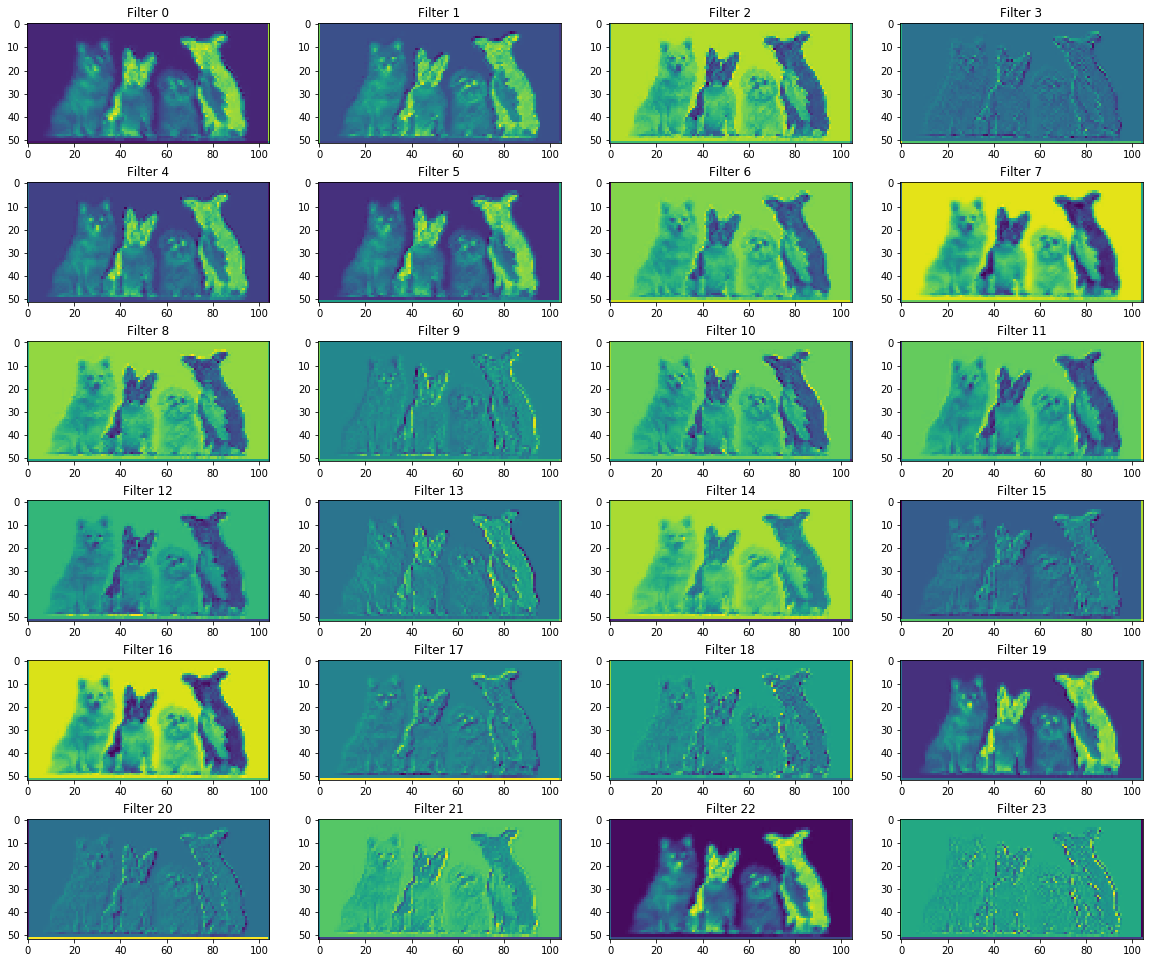

In [8]:
getActivations(conv_2,currimg)

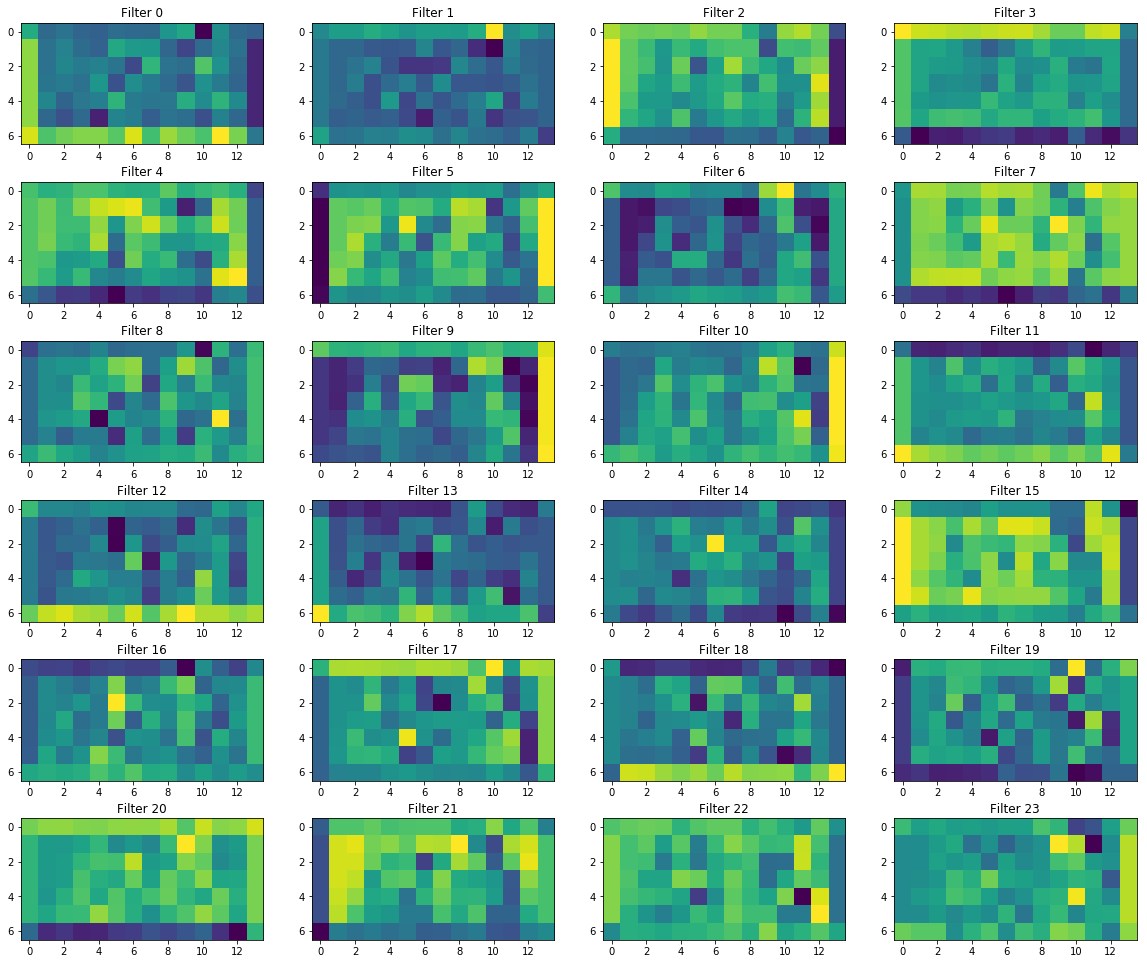

In [9]:
getActivations(conv_5,currimg)

In [16]:
#deconv_shape1 = image_net["pool4"].get_shape()
#print('deconv shape1:',deconv_shape1)
# deconv shape1 : (?,14,14,512)
#W_t1 = utils.weight_variable([4, 4, deconv_shape1[3].value, NUM_OF_CLASSESS], name="W_t1")
#b_t1 = utils.bias_variable([deconv_shape1[3].value], name="b_t1")
#conv_t1 = utils.conv2d_transpose_strided(conv8, W_t1, b_t1, output_shape=tf.shape(image_net["pool4"]))
#fuse_1 = tf.add(conv_t1, image_net["pool4"], name="fuse_1")
W_t1  = tf.Variable([4,4,24,4])
b_t1  = tf.Variable([4])
conv_t1 = tf.nn.conv2d_transpose(conv_5, W_t1, output_shape= [None,13,27,24] ,strides = [1,2,2,1],padding='SAME')

IndexError: list index out of range

In [12]:
from scipy import signal
from scipy.misc import imread
import numpy as np 
im1 = imread('./test.jpeg')
im2 = imread('./test1.jpeg')

print('image1 size : ',np.shape(im1))
print('image2 size : ',np.shape(im2))

im1 = np.reshape(im1, [-1,159*317*3])
im2 = np.reshape(im2, [-1,224*224*3])

cor = signal.correlate2d (im1, im2)

image1 size :  (159, 317, 3)
image2 size :  (224, 224, 3)


In [23]:
print(cor)
print(cor.max())
print(cor[0][1000])
print(np.shape(cor))

for i in range(len(cor[0])):
    print(cor[0][i])

[[1 2 3 ..., 3 2 1]]
255
205
(1, 301736)
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
51
52
53
55
56
57
59
60
62
65
66
68
71
72
75
79
81
86
89
91
96
99
101
105
107
108
112
114
115
119
121
122
127
130
132
137
140
142
148
152
155
162
168
170
177
183
185
191
198
201
207
214
217
222
228
230
234
239
240
244
249
250
253
1
2
3
7
9
10
14
16
17
20
22
23
26
28
29
32
34
35
38
40
41
43
46
47
49
52
53
55
58
59
61
64
65
67
73
74
76
82
83
85
91
92
94
100
101
103
109
110
112
118
119
121
127
128
130
136
138
141
148
150
153
160
162
165
172
174
177
184
186
189
196
198
201
208
210
213
220
222
226
231
235
236
239
243
245
247
251
253
255
2
3
4
7
8
9
12
13
14
15
16
17
18
19
20
22
24
26
28
30
32
34
36
38
40
42
44
45
47
49
50
52
54
55
57
59
60
62
64
66
67
72
74
75
80
82
83
88
90
91
96
98
99
104
106
107
112
114
115
120
122
123
128
130
131
136
138
139
144
146
147
152
154
155
160
162
163
168
170
171
176
178
179
184
186
18

150
151
162
166
167
176
180
181
192
196
197
206
210
211
219
222
224
232
235
237
245
248
250
1
4
6
12
13
15
19
21
23
29
30
32
36
38
40
44
45
48
50
51
54
58
59
62
66
68
70
76
81
82
90
95
96
104
109
110
118
123
124
132
137
138
146
151
152
160
165
166
174
179
180
185
187
188
193
195
196
201
203
204
209
211
212
217
219
220
225
227
228
233
235
236
241
243
244
252
0
3
11
15
18
25
28
30
37
40
42
49
52
54
60
62
63
70
72
73
80
82
83
90
92
93
100
102
103
110
112
113
120
122
123
130
132
133
140
142
143
152
153
154
160
162
163
165
168
169
170
173
174
175
178
179
180
183
184
185
188
189
190
193
194
195
198
199
200
203
204
205
208
209
210
213
214
215
218
219
220
223
224
225
228
229
230
233
234
235
238
239
241
244
245
249
251
252
0
3
4
10
12
13
17
20
21
27
29
30
34
37
38
44
46
47
51
54
55
61
63
64
68
71
72
78
80
81
85
88
89
95
97
98
102
105
106
112
114
115
117
119
121
122
123
128
129
130
136
137
138
144
145
146
152
153
154
160
161
162
168
169
170
175
176
177
182
183
184
188
189
190
194
195
196
200
201

161
243
62
134
202
10
69
128
180
229
6
35
59
87
108
126
174
218
1
9
10
11
18
21
22
31
33
34
40
42
43
55
60
62
72
78
79
90
94
95
112
125
133
156
172
185
234
23
63
181
36
144
45
198
90
249
145
38
168
38
159
57
204
92
226
100
225
64
152
237
54
123
187
232
14
49
86
119
147
178
202
223
18
65
107
183
252
62
178
34
141
46
200
95
17
191
104
26
197
109
37
217
136
9
131
250
102
206
49
133
210
28
93
154
210
16
71
123
186
245
43
112
174
233
46
110
171
239
47
110
179
246
57
123
187
251
55
113
171
229
29
85
143
199
255
49
97
145
182
217
252
23
48
73
104
133
162
190
216
242
3
18
33
44
53
62
72
80
88
92
94
96
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198


140
212
12
55
125
179
220
34
88
130
191
236
13
105
181
245
190
121
40
14
234
188
116
35
201
128
46
211
119
18
164
71
225
114
60
253
181
83
232
116
228
75
169
22
122
213
28
90
143
196
240
19
66
104
133
194
246
33
125
208
26
123
211
34
154
8
108
229
82
179
65
195
57
210
95
224
121
6
135
53
215
109
24
183
74
184
29
117
186
246
37
95
145
182
247
48
92
133
166
186
228
6
27
88
143
185
41
147
240
126
6
129
34
189
75
239
139
26
181
72
206
16
74
119
183
239
26
100
165
220
43
113
173
11
96
171
11
98
175
33
138
234
77
167
248
84
166
241
61
127
186
255
58
110
182
244
43
109
165
214
4
42
73
121
163
200
242
24
57
94
128
158
196
231
6
48
87
122
166
207
244
29
68
106
145
182
218
251
26
56
84
110
135
154
173
192
205
218
231
240
249
2
8
14
20
23
26
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
11

151
77
131
224
121
220
160
192
169
1
163
152
199
157
33
50
194
229
136
224
14
77
245
238
103
53
153
160
29
200
145
208
146
12
117
154
112
190
180
160
177
52
157
94
64
231
133
107
96
166
27
12
29
187
229
106
30
255
178
107
104
218
233
196
166
152
213
145
54
140
193
103
209
255
161
197
62
177
143
131
58
241
49
13
179
58
157
43
31
220
106
6
29
130
93
150
2
179
12
53
163
234
23
127
232
23
127
47
136
26
245
88
215
206
94
156
182
49
213
151
226
195
126
215
34
155
235
127
1
47
109
69
195
193
75
64
205
171
228
121
33
32
133
3
255
217
15
182
239
241
131
229
6
191
197
112
235
152
158
198
80
207
117
246
220
23
152
152
53
248
214
38
67
56
138
71
66
125
197
92
216
158
9
24
8
7
59
183
109
98
211
220
138
164
161
28
9
40
73
204
57
80
88
27
168
10
222
199
105
94
123
106
134
64
59
95
6
48
116
74
75
117
65
74
71
61
88
169
231
34
227
207
238
28
139
219
183
140
143
157
167
73
83
155
41
116
54
133
164
203
209
231
137
181
240
127
59
102
119
9
244
194
19
39
11
108
165
159
235
45
82
26
169
254
193
179
95
94
93

164
161
105
72
228
22
44
213
98
41
182
230
113
106
72
20
0
231
31
64
186
81
1
146
229
166
201
119
46
190
227
82
79
10
229
49
66
225
151
117
160
125
78
205
255
174
203
107
183
192
199
85
118
207
24
148
197
210
14
121
143
19
116
187
234
137
160
42
27
18
175
194
165
22
195
149
235
111
35
224
33
67
245
28
208
191
185
126
150
107
241
149
26
30
112
78
178
231
36
153
139
191
208
149
106
139
174
111
122
160
250
137
58
227
255
40
251
209
147
36
176
21
91
172
167
211
189
158
239
21
238
72
64
159
115
115
66
236
73
79
136
173
167
113
156
116
185
123
182
231
228
200
136
177
119
242
210
25
52
39
74
239
197
9
24
3
219
12
221
100
56
151
28
93
192
5
215
146
228
136
198
121
46
219
27
155
133
204
76
134
112
56
236
81
243
24
205
237
60
224
32
161
44
191
84
103
55
251
156
95
250
167
200
215
231
180
41
86
22
34
101
150
238
224
227
3
92
151
45
146
40
125
24
198
0
173
142
156
84
19
205
61
69
155
229
244
235
152
205
164
73
104
160
252
148
244
82
227
145
12
193
5
106
46
60
22
105
213
211
229
171
65
97
221
241
9

33
81
87
57
240
174
36
167
201
208
146
77
3
189
66
188
231
144
163
207
79
228
154
147
201
15
84
175
114
251
248
209
29
209
28
165
187
150
221
156
115
250
54
121
2
121
142
128
254
228
229
2
0
87
74
240
139
81
217
99
63
20
175
242
60
250
126
66
13
137
177
160
185
204
238
66
120
223
62
46
254
178
204
145
38
99
129
249
203
114
123
10
68
219
147
28
38
103
228
245
115
54
83
174
191
233
97
2
99
80
255
152
156
246
9
151
105
0
79
123
217
121
197
165
124
197
247
247
194
147
188
204
253
189
47
119
3
242
0
178
224
105
58
34
7
27
241
203
32
160
35
149
137
4
42
16
190
137
12
126
41
10
219
134
7
190
120
120
130
11
162
65
167
144
105
75
96
178
154
147
79
132
207
231
177
241
137
199
83
59
255
53
29
126
223
206
158
127
186
64
155
178
109
160
61
129
93
226
47
108
216
68
153
202
27
200
243
40
137
93
205
226
117
207
153
158
136
21
244
220
155
207
206
87
184
63
236
142
192
186
193
237
118
31
21
217
59
169
201
255
235
14
122
197
180
255
87
180
178
240
247
66
22
222
68
240
29
180
130
94
190
25
34
98
105
181
1

106
197
15
61
119
134
96
236
151
43
132
110
68
249
128
225
172
29
41
77
117
229
41
222
95
69
149
244
89
135
101
115
198
54
249
22
136
204
71
47
183
41
82
235
101
39
23
173
19
151
164
114
99
112
120
119
211
64
166
74
199
33
165
71
108
191
19
153
16
20
58
201
225
72
210
57
1
73
72
157
104
13
100
123
110
125
40
28
113
97
10
60
43
0
243
46
180
166
47
127
182
240
53
147
10
69
156
79
99
98
55
80
129
9
181
167
255
240
196
219
247
137
84
33
39
223
86
71
241
29
31
121
1
69
19
131
228
218
137
57
34
9
154
124
226
84
182
147
74
83
202
254
54
107
210
116
167
89
219
104
175
142
239
18
52
178
4
19
144
119
202
13
64
4
100
147
8
9
106
184
86
237
26
14
33
96
99
151
11
106
241
96
173
108
202
144
102
8
213
131
72
187
53
219
20
226
153
9
32
130
195
210
14
106
242
209
38
93
6
35
79
252
119
194
229
128
71
15
246
160
158
144
34
145
41
109
138
27
168
50
221
219
166
164
25
104
20
248
204
64
106
76
234
21
180
115
105
249
59
254
15
181
11
249
250
90
17
125
24
204
255
231
156
12
99
202
231
115
221
240
148
182
13
5

98
146
93
162
43
189
156
227
214
232
18
63
240
100
167
27
140
168
225
237
108
54
31
147
117
161
32
166
76
61
119
179
164
138
114
251
221
189
205
21
218
8
26
186
147
19
201
245
49
4
42
138
239
7
79
104
156
94
240
13
4
28
234
24
0
122
81
226
239
69
250
206
214
71
67
56
112
158
104
160
100
61
66
110
74
211
95
114
214
88
225
93
153
170
20
40
119
36
69
33
163
187
220
77
2
157
219
228
233
90
0
51
200
55
188
194
245
41
64
7
153
1
153
253
184
131
204
93
131
96
47
178
32
103
35
30
49
238
101
227
102
61
53
66
86
101
142
230
121
75
162
32
209
94
88
102
130
198
1
254
109
168
238
245
121
194
172
216
235
121
113
51
115
64
194
208
121
232
74
228
150
7
230
237
190
185
147
99
88
187
233
127
174
125
116
74
219
165
19
241
45
172
146
176
166
33
86
241
76
208
110
240
254
131
6
28
199
178
235
156
122
93
13
253
97
102
54
66
158
31
81
201
151
79
43
61
90
71
98
179
206
176
96
189
56
13
125
106
19
67
219
70
50
254
138
37
148
146
79
141
43
214
165
193
23
99
214
23
122
196
33
28
211
55
247
234
133
128
223
137
166

254
31
20
217
167
181
181
93
109
15
10
238
88
104
192
125
162
123
135
45
180
167
121
42
0
117
63
37
4
12
187
162
104
186
18
72
76
113
144
151
176
90
125
124
157
242
218
147
235
156
61
69
16
253
23
3
7
67
60
195
50
121
98
191
13
173
151
142
239
225
43
104
97
198
1
180
120
2
193
125
54
177
183
224
245
22
168
104
244
228
78
3
122
23
71
118
42
2
102
229
248
26
169
208
117
159
150
33
40
217
66
129
65
145
241
84
71
79
175
103
109
95
93
187
65
174
162
208
74
26
173
134
18
240
84
23
157
150
14
237
79
209
158
229
162
39
75
107
119
206
62
185
113
41
163
13
122
144
97
64
193
85
109
105
253
131
83
204
79
211
189
63
216
71
247
43
100
154
27
179
99
255
180
72
109
11
61
82
242
43
229
188
219
26
159
37
58
231
16
34
234
88
178
135
50
106
186
147
2
153
159
194
82
178
222
225
90
248
225
79
86
153
11
112
188
35
172
172
22
220
22
79
254
160
168
86
58
169
33
52
76
133
68
158
88
81
242
166
233
223
52
108
223
234
171
168
229
182
53
63
14
36
91
148
169
209
228
163
16
37
153
175
114
124
134
33
161
86
105
182
15

16
130
33
254
46
82
110
67
106
21
136
198
127
144
72
211
157
168
50
156
111
7
21
170
62
91
87
192
10
241
213
58
72
190
76
137
175
84
188
157
70
249
197
188
214
62
100
51
211
222
79
247
63
206
20
230
88
25
235
143
238
163
237
106
171
78
186
205
7
96
230
7
109
195
156
247
3
34
115
145
253
18
2
158
46
153
47
53
15
135
134
99
181
113
55
177
21
209
23
128
170
207
57
208
249
61
69
166
211
178
146
132
124
75
31
122
103
209
18
42
79
178
136
83
255
31
3
44
116
151
152
88
198
131
190
214
185
245
137
51
51
21
43
98
52
142
176
240
29
27
124
182
238
138
30
132
207
31
234
222
188
23
11
239
237
109
100
7
232
131
220
202
127
16
71
184
57
66
119
69
214
41
250
239
109
124
54
203
109
99
177
232
255
75
221
215
45
170
215
87
210
131
97
177
54
80
249
50
136
144
14
29
107
225
40
24
9
218
178
143
81
97
149
149
192
55
19
91
82
151
120
42
221
88
191
229
237
97
181
74
15
96
108
110
195
145
111
39
131
225
129
133
94
251
18
171
66
115
210
70
245
84
65
112
221
121
40
42
76
216
75
181
58
175
244
252
50
96
196
254
11

226
128
105
172
154
174
232
162
176
138
250
121
129
123
90
220
110
12
133
203
202
143
35
236
112
189
55
166
182
158
222
27
181
112
230
17
254
186
76
198
51
215
102
103
235
176
173
119
210
63
39
25
192
155
214
104
80
226
118
178
66
115
116
24
145
62
77
30
253
209
44
79
255
128
141
247
220
52
71
125
255
144
156
173
164
201
79
128
207
200
151
45
163
54
141
112
26
144
233
30
213
108
127
84
166
2
162
230
195
118
70
72
217
20
76
111
55
164
232
254
194
57
114
233
237
10
24
111
31
231
46
77
4
165
220
9
184
112
213
187
27
0
164
95
237
58
1
92
187
159
29
37
59
137
79
225
150
245
227
19
44
200
137
202
95
4
221
220
23
234
160
43
19
186
68
192
1
132
234
107
72
32
231
207
232
211
58
96
241
152
24
144
9
78
161
249
129
3
39
58
26
82
19
201
158
69
179
168
21
95
40
55
158
167
157
192
155
28
90
240
1
210
179
195
147
24
151
43
30
243
172
126
196
212
97
185
201
33
187
31
62
185
38
166
226
179
211
111
39
87
186
89
207
241
187
251
187
118
238
231
173
37
73
11
29
166
218
64
11
156
175
124
141
172
80
27
154
22

184
49
59
43
178
161
182
153
15
22
15
227
71
51
143
231
206
221
165
221
10
55
67
25
176
36
244
64
243
48
226
9
180
53
126
213
127
0
31
143
223
199
38
118
183
181
55
203
202
170
20
105
251
56
205
160
61
186
48
196
4
235
233
193
43
210
34
68
180
244
82
178
65
76
201
206
232
99
182
1
161
20
180
10
193
92
123
156
156
138
114
189
21
141
13
235
198
175
22
28
137
6
118
101
137
130
220
150
204
106
12
70
52
156
219
101
55
190
124
236
55
83
17
7
109
149
194
79
218
221
234
115
26
187
40
234
122
48
151
54
180
216
183
117
172
75
72
137
238
154
90
48
113
253
217
241
114
10
160
41
242
154
134
145
12
78
89
27
193
72
10
166
237
119
35
234
124
86
34
100
91
251
77
186
40
6
68
44
81
214
240
158
105
200
150
140
235
171
187
228
208
29
232
52
60
152
182
166
183
223
62
136
192
225
55
97
148
61
236
111
225
177
114
69
154
19
138
26
101
132
125
12
33
191
178
231
144
169
126
15
209
232
11
36
116
26
172
152
98
138
99
63
85
145
110
97
198
240
84
241
160
170
66
78
137
80
66
233
164
110
25
243
37
167
88
253
38
215
12

0
180
26
90
122
178
3
138
101
12
123
237
182
250
199
126
16
9
249
237
213
85
94
217
204
208
92
106
190
21
92
80
213
210
174
89
109
112
232
118
154
244
121
63
98
110
165
181
79
32
181
84
40
26
249
92
87
92
213
27
218
34
252
79
81
179
13
70
212
87
190
35
115
68
224
83
70
47
255
233
112
224
198
208
91
88
10
169
112
213
73
247
53
110
118
40
205
153
45
137
141
9
128
187
76
24
22
15
85
231
176
179
54
241
99
51
117
57
31
55
129
32
26
128
20
53
182
88
197
127
140
173
95
65
30
255
9
72
236
119
87
102
38
254
245
144
204
197
95
227
220
135
90
154
146
192
126
46
84
68
101
210
113
142
189
135
108
158
97
189
0
217
118
216
157
149
194
240
217
255
224
73
214
39
213
88
133
153
21
78
93
192
131
148
88
167
43
171
240
3
60
226
90
118
147
191
246
42
20
85
133
115
145
252
151
124
185
29
96
61
93
35
233
246
31
85
145
222
82
166
45
54
154
76
151
75
84
95
217
237
62
179
84
60
175
244
30
239
217
108
153
173
128
170
1
72
235
92
162
133
162
37
49
199
167
28
113
154
239
21
98
213
32
196
210
60
177
43
216
19
61
0
2

245
82
17
142
116
255
0
245
186
152
235
190
8
82
190
221
164
63
246
49
125
232
133
67
4
221
213
135
162
68
195
146
98
4
113
26
141
8
89
155
134
104
134
15
130
13
35
242
161
211
3
44
22
82
187
19
161
21
233
193
4
52
204
80
155
138
67
5
106
68
97
253
193
140
119
95
85
101
96
30
233
1
131
13
16
211
138
31
212
47
55
208
187
106
61
255
114
154
110
53
121
175
142
30
153
184
235
15
93
237
229
1
59
138
138
178
245
80
167
102
205
169
79
20
160
115
24
148
22
180
142
37
17
40
8
140
240
92
88
110
150
14
98
144
150
91
161
235
124
152
185
30
192
50
147
170
213
38
245
120
104
121
62
198
253
85
46
233
246
243
103
197
95
49
231
115
150
208
135
40
5
123
245
158
142
171
97
22
19
15
10
155
85
36
136
170
216
38
63
8
111
174
119
8
111
216
137
175
235
169
249
73
2
92
14
41
169
74
26
21
52
68
13
81
62
161
163
68
248
37
224
168
197
169
142
243
234
251
117
37
217
144
247
72
203
9
86
150
152
23
125
242
255
130
52
189
88
124
44
29
20
85
38
61
203
27
176
2
61
140
254
218
112
208
119
250
152
211
158
86
203
67
134
7

244
245
93
144
179
142
246
120
178
51
101
15
29
189
244
229
71
10
234
178
52
6
20
40
244
176
115
17
170
189
88
87
255
72
77
27
89
110
61
51
140
204
190
5
193
133
231
188
91
206
80
118
187
71
218
18
111
83
215
88
151
236
232
241
186
233
213
222
238
109
87
222
223
97
195
0
47
55
25
153
219
13
206
24
89
204
243
221
145
69
25
24
55
145
153
26
155
107
199
150
134
36
225
151
181
112
57
131
173
142
58
155
69
25
15
0
34
32
157
52
159
199
184
196
253
40
111
58
90
213
175
25
95
232
126
208
222
220
172
112
235
181
182
183
113
18
13
2
124
199
225
180
126
123
101
232
61
189
108
144
83
39
28
99
125
178
62
161
81
172
239
211
73
87
168
76
218
71
104
252
130
195
226
188
31
123
151
253
198
154
32
6
104
14
111
222
177
198
215
19
197
18
229
65
154
211
97
63
124
210
47
8
146
139
227
255
114
218
142
210
86
98
91
9
172
122
118
221
184
93
213
119
77
86
112
83
134
30
84
224
166
237
92
31
87
208
21
255
95
22
33
65
176
48
86
22
177
211
63
183
106
200
52
177
134
52
223
85
243
240
45
113
35
115
73
13
203
12
84
105

110
55
152
251
220
178
96
8
146
127
133
61
140
46
13
210
140
14
76
155
222
205
116
63
91
158
104
108
169
49
82
86
160
2
16
45
167
98
19
167
102
250
158
72
174
43
167
122
64
25
202
157
170
131
196
5
126
143
95
152
166
82
24
202
142
241
156
33
148
188
185
134
229
54
58
165
67
141
125
229
162
207
213
132
36
190
66
50
222
2
161
138
190
130
42
140
39
249
110
165
164
213
159
11
122
200
181
152
202
116
59
124
234
103
159
208
46
20
243
231
49
237
227
194
213
89
198
189
193
162
209
25
193
190
138
194
169
91
187
167
141
175
75
36
82
52
242
0
81
24
124
35
196
144
116
27
64
111
121
120
254
129
235
81
225
249
228
60
119
88
209
194
109
83
225
143
72
219
16
161
169
143
62
197
69
242
43
59
204
55
40
255
112
192
178
255
177
206
29
187
147
23
41
44
58
192
110
186
78
174
131
167
165
193
45
67
151
168
177
93
36
153
218
192
71
124
42
166
121
229
0
174
223
96
152
75
32
145
30
189
223
91
152
127
237
38
110
219
194
211
155
245
218
189
218
169
82
156
92
236
224
74
176
124
72
160
166
216
102
60
213
85
158
80
89

27
236
189
2
20
164
101
250
227
227
134
89
149
172
229
120
175
219
219
235
93
29
238
34
191
103
194
230
157
122
175
156
100
164
253
153
54
56
197
5
237
188
246
67
0
254
241
217
120
60
177
163
60
177
220
194
56
73
202
107
179
55
249
40
167
127
233
53
96
61
213
197
160
61
37
101
136
24
213
184
68
156
178
170
89
89
199
202
95
93
147
104
104
90
114
237
204
192
86
79
24
10
30
212
213
156
79
59
126
98
200
246
33
173
25
187
83
94
166
76
157
168
181
106
196
155
191
147
75
250
116
181
89
64
48
63
62
68
190
169
175
161
65
255
93
125
220
220
239
240
134
187
93
178
87
238
65
234
82
79
136
92
225
20
125
32
182
61
135
60
65
235
152
111
48
101
45
208
253
187
31
68
58
193
29
177
20
222
68
206
50
169
181
5
17
215
56
24
31
28
114
184
130
195
140
112
149
9
29
122
68
241
42
32
60
18
89
82
76
59
203
155
126
16
120
144
173
178
31
241
49
108
176
34
176
133
224
188
35
161
55
150
207
25
243
120
150
180
245
219
16
23
138
2
119
187
83
144
183
67
121
198
229
153
133
81
85
34
153
206
90
212
49
133
131
37
82
207
23

98
146
129
28
97
71
41
108
187
64
78
230
141
197
76
76
19
20
221
253
132
136
189
134
208
128
122
17
129
234
90
28
168
193
93
82
37
82
145
158
194
231
64
126
196
236
90
167
110
114
145
53
33
201
83
191
45
248
49
51
44
68
160
99
158
124
214
176
69
109
250
211
212
17
149
75
45
25
202
23
29
254
170
99
1
188
107
45
255
236
191
156
238
32
98
42
37
255
235
56
227
183
31
41
22
3
166
159
34
79
236
50
188
32
132
27
7
136
40
114
142
227
76
63
145
123
235
108
114
119
4
147
78
163
191
238
210
128
15
64
229
115
221
11
9
183
255
240
22
148
206
113
34
154
153
85
244
43
111
61
69
188
135
59
194
244
68
107
75
0
5
82
85
168
185
193
77
63
172
38
36
212
131
68
216
155
104
124
0
40
57
65
137
167
155
131
51
133
144
27
19
179
117
240
118
219
215
106
251
7
89
84
62
27
152
225
16
242
154
251
213
113
131
38
57
36
241
70
25
88
176
135
19
183
220
40
234
42
142
69
19
82
139
165
15
204
196
171
96
250
208
173
149
104
212
35
169
232
184
138
23
10
126
76
83
109
35
15
36
225
71
173
157
136
7
237
130
37
240
130
196
235
3

182
91
112
6
38
13
200
101
170
229
119
244
124
162
158
133
12
58
73
24
11
143
79
193
170
50
204
93
137
188
139
124
174
189
128
237
23
151
196
173
53
201
128
172
57
104
166
2
37
150
201
140
215
240
109
73
220
209
176
144
177
115
44
165
118
138
48
124
226
242
111
87
223
79
108
245
14
201
120
36
121
17
194
98
72
147
78
177
40
143
246
44
110
218
246
99
246
4
233
241
209
198
246
122
145
122
83
154
92
156
126
70
7
72
178
215
19
191
158
178
16
135
115
249
234
49
151
175
17
237
36
22
201
214
205
161
0
10
80
157
32
213
109
21
55
168
141
169
22
17
166
160
137
49
92
116
197
219
142
166
133
124
183
114
232
122
55
209
67
183
242
153
145
107
39
1
196
34
229
127
68
87
5
130
42
38
55
235
140
181
184
149
47
204
55
32
152
190
247
24
145
97
132
129
163
48
247
54
255
172
143
184
19
110
92
51
151
72
99
200
82
210
222
59
47
111
56
214
216
119
118
6
231
237
135
253
9
192
104
40
6
235
131
109
136
214
85
94
188
186
94
102
125
113
107
171
17
177
93
139
124
105
96
32
102
86
231
244
166
132
61
83
118
137
27
111
4

132
4
155
74
184
114
166
25
113
127
4
64
20
59
135
80
144
55
81
164
191
116
2
228
62
62
194
219
142
241
89
110
96
36
109
20
50
241
52
131
111
160
235
82
156
222
81
116
81
99
178
140
229
167
215
201
179
125
115
110
72
223
181
51
163
186
23
129
192
167
205
32
137
121
216
195
110
140
73
25
191
227
195
116
138
75
10
213
118
178
220
81
105
58
26
181
238
67
211
9
144
85
126
51
16
123
63
31
125
160
36
106
229
173
118
243
196
184
44
70
4
16
160
51
80
61
144
78
212
239
251
80
105
74
6
255
25
59
7
212
90
123
160
181
109
7
121
86
191
2
232
31
156
22
112
226
133
206
147
221
149
49
75
228
217
95
115
12
52
135
119
109
196
158
9
195
121
121
147
208
96
169
130
145
99
64
98
206
86
200
110
151
55
115
218
154
84
194
39
234
199
28
225
84
168
234
107
123
230
6
52
231
78
138
71
165
215
185
4
74
254
139
213
191
252
15
89
140
109
97
67
150
187
17
67
13
18
244
55
99
170
12
11
100
49
0
76
28
42
225
162
133
192
140
160
141
97
177
60
243
245
73
225
169
48
99
170
103
237
3
55
150
215
54
144
210
68
70
120
156
71
22

244
10
219
250
49
192
229
80
15
82
99
56
239
246
89
147
98
122
120
6
124
89
30
142
243
2
145
229
241
0
213
56
174
179
180
27
127
239
43
244
237
181
214
131
217
89
81
71
68
165
41
35
173
79
6
38
172
0
125
187
109
187
132
241
21
100
193
236
109
222
35
229
150
113
214
64
172
55
86
93
108
91
215
219
103
124
68
115
235
219
212
189
242
43
60
224
137
55
160
240
49
147
217
226
224
124
52
192
245
93
229
228
54
86
244
184
4
170
161
218
111
125
230
250
32
27
63
141
109
32
67
84
85
158
136
231
122
70
230
17
26
19
110
153
80
153
41
112
135
192
166
73
111
43
68
184
243
83
93
204
7
78
167
66
21
65
255
34
79
75
58
173
185
131
241
159
136
175
14
9
176
166
134
191
118
250
213
243
77
232
31
181
193
14
99
67
108
76
55
181
162
237
99
178
182
118
127
167
197
215
181
171
91
216
146
154
200
224
43
88
148
87
133
99
193
24
160
86
43
21
222
77
9
89
244
29
132
75
44
215
244
154
46
131
128
183
227
112
184
96
200
208
254
206
238
155
144
252
219
186
245
232
196
109
112
52
96
6
190
239
202
74
53
183
41
132
109
174
18

1
69
232
167
155
68
113
197
175
60
158
100
127
240
69
104
243
44
153
238
166
57
26
55
59
183
123
194
109
110
0
135
9
97
163
110
214
75
34
249
207
214
97
164
8
152
126
45
14
202
12
217
159
165
220
192
87
7
196
33
50
45
248
227
27
138
252
201
51
244
136
34
149
253
16
93
203
218
213
199
21
192
155
93
226
145
255
230
61
57
55
244
138
193
36
235
233
103
4
31
65
179
51
12
204
188
28
212
145
233
76
193
88
77
67
13
148
175
139
7
184
50
4
209
7
226
97
190
138
85
62
162
77
234
232
8
250
255
191
189
143
211
133
169
77
154
51
47
132
163
230
187
45
15
18
143
145
1
166
11
79
184
22
70
126
251
1
98
68
82
180
36
92
117
34
176
219
187
100
233
228
57
223
254
137
198
89
159
150
27
184
174
188
249
87
71
41
225
153
83
219
184
231
249
13
91
62
223
242
241
111
81
95
213
55
56
235
250
40
224
33
121
33
181
83
136
201
176
232
168
45
109
5
69
179
187
153
12
7
200
193
18
196
157
215
5
218
148
245
174
170
228
79
210
132
195
38
25
52
100
40
195
246
70
60
168
154
126
76
254
120
7
124
191
81
126
253
135
131
233
110
1

227
218
163
106
200
102
184
108
197
178
211
146
141
117
96
23
51
227
107
221
86
225
188
157
8
64
53
69
96
179
182
115
165
45
185
140
6
118
106
31
192
169
134
146
41
159
8
207
163
0
9
49
11
239
79
42
17
158
1
181
41
222
31
39
128
46
183
94
3
185
54
215
146
246
253
25
3
212
131
114
98
118
228
215
95
164
110
0
223
247
146
1
39
102
89
128
214
76
122
11
210
188
60
190
172
110
50
137
117
123
67
197
156
68
87
21
144
83
63
189
135
175
21
116
183
145
167
207
235
182
31
232
72
107
27
10
51
176
82
212
60
112
39
166
232
67
64
167
181
34
104
3
115
238
18
113
254
84
155
23
93
44
201
202
230
21
88
217
132
69
171
124
117
29
238
190
33
111
139
133
94
82
41
176
4
33
128
37
167
101
223
182
139
46
178
193
64
125
153
182
170
105
184
239
213
222
177
23
32
248
239
174
113
254
125
199
213
103
229
212
168
254
76
206
233
220
107
100
45
82
37
35
243
95
122
242
114
206
51
89
42
149
153
158
38
43
249
119
25
176
150
3
73
114
155
191
153
20
34
132
210
10
9
35
116
93
138
203
211
176
160
89
122
19
71
105
31
199
147
39

255
37
66
51
167
139
11
183
76
242
148
163
241
28
112
226
103
207
144
10
69
253
173
254
203
170
71
138
194
175
57
45
47
105
135
91
114
198
14
12
215
103
147
17
122
209
115
208
150
127
129
147
190
75
57
122
226
190
235
178
224
144
8
224
58
33
49
112
45
217
144
176
224
220
60
190
52
142
188
4
67
131
113
126
19
195
86
0
60
51
249
102
48
60
29
239
221
138
151
28
180
34
252
65
39
154
251
187
95
2
96
233
64
157
199
130
195
169
151
60
147
65
53
204
17
230
235
92
36
195
105
215
68
30
89
225
43
23
75
48
42
157
70
133
39
99
27
131
254
80
104
72
188
77
111
164
116
3
119
154
11
187
111
39
109
179
252
10
65
33
119
29
33
209
236
227
24
14
167
137
29
168
136
107
79
230
240
214
193
217
192
71
48
164
244
188
135
112
74
157
166
215
109
132
55
67
40
3
77
198
55
206
134
202
85
0
245
42
73
181
10
54
90
12
234
80
68
44
132
240
106
106
45
206
229
24
115
194
164
232
134
172
45
255
245
80
62
164
175
250
200
163
139
225
3
67
67
74
39
10
242
218
252
193
255
157
35
122
213
50
76
57
166
181
225
224
102
123
228
207

221
170
71
130
193
207
154
19
125
44
106
161
10
255
131
186
74
208
65
251
203
137
144
5
149
92
98
161
253
1
205
244
208
143
214
4
201
202
176
126
93
128
111
24
124
232
106
70
147
184
2
239
218
9
59
205
180
82
108
71
211
120
39
124
101
96
199
160
122
8
129
183
32
199
61
8
54
89
174
65
193
149
85
52
82
105
222
253
146
157
102
113
175
255
118
139
238
20
138
4
92
251
91
64
75
166
233
110
77
209
130
216
252
205
190
144
62
233
50
28
196
171
61
45
73
255
158
210
30
66
88
247
77
14
195
154
21
78
112
133
191
20
133
30
219
149
135
49
145
59
206
46
224
204
181
121
245
4
19
92
184
66
253
60
24
5
205
93
45
255
160
210
184
140
52
182
97
85
118
104
183
49
141
62
11
42
21
107
44
204
84
1
40
147
61
57
57
103
184
189
108
124
133
180
81
65
64
222
102
60
87
201
171
232
116
33
61
151
200
148
149
0
167
207
167
108
114
128
111
173
104
242
249
140
102
252
208
58
27
155
211
49
88
128
251
197
108
114
159
144
96
45
151
83
16
95
20
35
161
182
157
30
233
76
209
159
13
53
194
172
222
130
5
193
216
93
82
64
105
30
1

181
5
252
116
187
162
215
115
58
119
93
53
241
128
182
80
184
172
144
50
117
88
144
36
39
4
7
47
101
171
118
24
155
116
225
94
90
25
231
116
233
69
32
109
142
26
22
215
86
31
194
18
231
82
120
25
197
159
127
116
227
114
145
86
31
179
49
44
79
160
85
4
242
237
53
54
45
81
143
94
103
93
249
114
102
148
107
51
166
141
101
154
233
135
51
102
190
208
198
14
250
161
190
187
161
56
232
145
173
195
245
54
125
219
75
83
209
90
201
93
129
182
70
49
119
181
202
50
163
132
248
50
124
134
78
119
135
205
5
193
163
213
170
81
243
7
244
1
202
76
75
149
126
167
102
228
253
220
88
213
61
35
46
100
133
161
220
20
96
212
182
13
14
41
254
238
113
223
73
232
116
5
76
49
159
244
178
64
160
77
206
168
239
98
25
166
136
254
155
93
240
54
194
148
201
170
131
65
116
121
156
169
6
212
223
173
52
201
33
3
24
8
36
226
101
116
80
3
187
99
44
178
236
142
243
245
120
190
71
86
215
76
67
31
147
91
180
7
77
168
111
227
229
89
66
84
120
137
213
201
6
112
25
108
162
186
199
201
123
202
100
68
141
120
250
160
159
236
190
8

224
173
48
58
130
58
80
41
149
168
72
206
200
135
224
251
135
201
220
101
156
203
161
109
184
158
7
11
162
31
245
111
202
222
204
215
165
79
108
12
209
127
223
251
174
9
243
225
30
2
71
86
157
206
0
105
170
92
80
143
196
116
53
177
136
113
133
143
114
164
181
13
134
227
193
163
120
238
246
188
220
39
219
23
74
254
54
123
129
219
4
70
202
206
163
46
166
113
49
70
143
238
160
189
125
109
168
49
140
195
187
12
220
53
177
197
165
98
103
243
28
10
12
179
161
146
62
10
50
252
108
23
198
9
171
109
99
18
251
234
11
155
91
107
92
64
199
194
158
113
172
159
219
167
227
149
135
205
135
4
99
235
176
123
45
138
62
13
176
73
194
60
109
36
228
215
51
187
32
37
210
151
172
153
217
246
16
49
137
249
109
61
58
170
180
10
12
195
17
150
35
123
166
242
28
65
254
250
238
168
229
154
51
97
216
169
98
146
46
21
229
4
76
209
162
147
87
237
60
161
32
77
54
238
89
73
57
160
82
3
80
158
120
77
58
17
153
68
17
176
210
249
189
73
202
251
30
27
56
244
193
133
141
5
144
33
192
60
135
68
203
167
158
212
14
53
162
42
1

147
109
194
55
75
48
208
236
62
95
122
12
42
75
22
136
209
111
234
74
60
208
36
137
138
159
62
108
175
76
96
93
228
101
25
194
147
40
131
62
124
120
57
50
15
117
36
2
67
119
222
69
1
79
130
249
115
25
83
216
71
144
128
49
108
62
115
139
88
188
208
106
193
207
201
18
236
34
153
95
185
223
201
155
65
71
94
246
166
216
244
90
50
106
12
131
55
178
153
255
37
118
24
9
88
228
29
30
181
173
196
24
84
112
59
18
79
191
41
3
170
223
102
35
36
164
174
22
14
145
53
50
174
125
247
138
255
64
105
255
211
94
13
231
159
207
206
31
163
172
42
237
77
181
165
31
146
219
109
107
139
242
237
37
159
211
35
157
18
155
237
218
126
201
93
237
91
179
158
41
31
41
49
55
235
5
138
189
7
59
137
224
69
198
27
15
36
154
6
100
87
223
216
148
134
182
50
210
119
8
231
35
66
155
195
162
10
222
235
172
172
0
4
193
206
7
205
205
139
82
166
66
104
57
65
128
94
18
130
150
210
9
58
171
59
166
97
219
191
7
165
39
253
140
5
119
63
133
7
189
4
211
166
30
59
14
95
174
43
102
178
243
167
226
110
170
162
8
18
29
0
126
233
56
85
21

251
91
201
158
113
111
245
220
115
52
105
2
48
1
98
224
163
149
31
173
44
132
156
124
63
61
100
187
249
92
195
129
218
31
247
169
3
160
43
191
226
131
217
99
43
107
219
216
0
232
200
15
116
110
110
226
183
150
134
151
216
155
198
143
184
118
175
82
137
6
220
157
64
49
39
116
190
26
175
87
126
226
52
251
160
248
181
83
176
55
253
209
189
208
115
238
184
134
193
67
47
122
76
175
198
251
62
244
132
23
63
39
3
65
146
14
66
238
28
122
182
173
99
193
117
155
133
53
1
16
105
131
23
119
160
72
91
4
210
119
227
125
161
171
157
112
96
24
31
123
201
32
251
100
167
73
14
6
204
239
253
79
120
166
217
162
161
116
172
80
233
150
29
224
207
147
132
241
5
105
31
205
128
248
245
37
154
230
106
187
253
52
60
1
87
135
30
100
21
147
209
83
83
43
34
93
189
30
189
122
5
34
137
7
18
221
107
213
205
75
3
231
155
144
76
24
174
91
233
154
115
159
130
74
94
14
47
191
195
216
67
240
62
90
45
187
204
95
213
144
120
195
122
187
202
31
233
253
118
130
81
10
108
240
22
140
89
98
215
143
240
200
120
44
219
204
141
173


161
28
222
5
3
165
230
216
198
138
197
38
144
157
215
40
154
68
208
101
221
240
178
221
251
54
229
173
232
185
50
19
12
77
130
219
38
125
87
1
177
155
153
61
208
130
206
51
76
104
24
65
245
49
172
106
111
5
166
220
12
225
130
215
124
57
185
14
122
206
105
84
77
100
211
102
35
162
251
226
211
118
171
105
249
92
149
9
95
55
62
131
167
27
132
202
72
103
7
244
62
123
90
211
6
92
155
32
129
126
181
12
3
148
179
16
26
227
234
77
134
169
5
73
58
183
140
213
88
66
86
21
224
188
92
172
68
160
153
142
40
255
192
66
31
106
253
4
94
162
38
147
233
75
248
179
163
110
189
61
97
143
89
89
112
202
120
151
86
249
125
23
206
205
114
192
7
70
79
115
208
169
99
160
146
168
176
152
11
109
100
205
139
220
71
231
145
180
192
145
35
38
45
212
89
197
5
42
171
73
101
104
164
124
29
125
157
16
225
64
55
224
246
145
53
115
166
17
168
136
125
154
78
90
32
121
162
5
140
62
200
177
235
163
131
122
3
233
178
169
203
89
180
121
22
112
246
228
163
39
225
162
184
77
239
71
161
211
71
238
170
186
7
221
153
187
8
187
237


17
176
31
116
131
53
157
139
56
104
213
75
34
32
245
131
105
10
66
112
53
186
150
84
67
18
54
87
227
205
234
67
28
216
6
190
46
103
97
96
71
10
108
23
157
243
218
231
199
79
16
47
96
199
16
54
206
249
38
227
97
250
60
137
224
209
96
246
19
246
105
144
223
40
40
71
200
133
183
94
240
89
166
10
16
36
84
134
63
166
80
156
59
25
172
13
148
22
222
225
242
103
160
240
166
6
8
32
170
219
207
81
50
118
58
248
125
184
183
101
76
56
81
13
144
154
189
108
210
67
154
61
179
172
136
253
98
28
107
109
65
134
191
67
183
228
186
59
187
198
254
60
202
71
108
229
49
159
34
210
52
94
57
1
2
63
126
90
102
249
51
42
80
207
252
242
52
233
12
34
239
167
52
162
137
46
169
30
190
234
53
106
207
31
78
20
179
6
208
34
233
97
135
186
52
32
35
245
204
76
17
153
11
87
117
124
65
246
178
156
208
201
220
188
96
108
194
124
32
172
91
178
122
50
245
121
181
147
198
174
210
97
122
82
208
170
190
53
241
254
110
203
20
242
139
101
246
232
48
89
20
109
204
85
137
139
32
233
25
220
247
240
145
147
144
237
115
217
163
192
15

169
60
135
84
146
253
22
80
84
10
23
52
56
250
70
15
62
71
160
30
154
188
164
157
73
173
76
118
27
75
94
207
96
221
95
81
5
134
11
254
131
36
70
163
149
176
17
128
65
77
239
77
164
255
254
87
243
10
1
39
10
253
65
173
238
213
103
24
61
230
49
24
112
182
170
160
156
68
162
148
244
139
212
144
176
35
13
113
131
3
43
108
109
240
160
76
216
24
114
54
161
54
205
243
205
168
101
83
252
87
12
166
98
124
14
244
150
116
134
56
160
112
143
103
22
240
249
33
37
161
92
229
207
254
226
136
167
103
176
190
108
214
144
240
154
137
43
86
207
252
4
192
27
208
155
252
195
178
36
228
75
216
48
44
229
3
132
237
111
43
160
124
171
41
53
177
32
227
196
97
36
175
244
36
70
249
158
235
197
114
65
238
162
149
128
90
236
25
51
110
154
34
17
16
110
74
183
161
190
229
71
120
174
112
153
253
134
78
157
44
38
18
197
58
129
0
86
238
108
57
69
135
70
239
13
57
224
68
23
7
228
78
76
9
123
238
174
213
253
73
170
19
82
5
128
23
214
170
244
43
83
102
180
159
87
165
13
75
150
41
39
125
115
67
174
233
203
147
42
94
222
218

10
176
71
27
251
229
62
83
248
147
199
76
187
123
230
237
161
120
231
69
191
77
218
115
116
252
176
208
201
51
177
152
17
236
125
243
110
30
234
78
161
108
151
227
158
144
140
184
157
127
7
110
37
137
11
188
22
221
131
207
179
232
39
177
111
16
201
202
71
49
23
170
138
20
129
107
189
51
74
193
235
140
37
107
46
38
190
208
195
135
110
82
71
9
238
191
206
60
28
255
16
64
78
99
189
169
214
18
121
110
93
58
122
86
139
38
62
215
226
142
198
103
195
255
169
89
135
175
13
63
121
156
43
248
30
207
33
96
216
93
138
52
74
169
205
98
42
157
143
80
2
175
42
247
172
0
84
232
127
62
33
238
84
84
54
230
7
21
182
144
102
128
124
235
14
100
88
116
109
246
93
255
25
91
186
162
209
233
49
11
47
171
239
83
77
208
224
93
231
41
146
236
71
249
44
150
144
39
189
91
177
226
124
195
160
160
66
178
165
94
185
94
122
10
205
68
183
230
65
158
69
16
42
36
98
243
191
118
22
250
215
7
242
250
130
8
167
187
124
167
55
74
244
130
173
117
238
168
199
29
231
157
68
199
230
163
235
130
80
162
232
171
104
72
71
95
126
181

191
198
148
188
24
148
126
237
220
60
87
163
189
219
143
195
61
244
207
155
109
28
138
90
57
99
107
211
83
214
212
217
83
94
56
197
53
118
157
203
32
131
159
162
194
67
222
239
144
135
74
99
162
227
252
54
86
174
100
193
190
208
152
135
44
101
196
116
205
74
172
90
139
49
2
99
35
116
167
148
45
97
28
37
239
74
217
193
63
90
194
100
164
183
253
126
239
182
88
46
190
0
78
76
225
138
49
2
141
173
167
22
82
218
63
35
144
197
104
153
57
200
68
233
217
59
13
224
92
200
163
124
83
228
50
6
113
89
152
249
69
65
223
44
152
56
172
96
165
146
86
189
138
77
15
142
89
197
192
39
27
216
107
26
228
111
217
122
231
148
7
131
171
199
206
77
226
39
57
173
230
174
223
234
68
28
40
189
188
230
139
169
97
137
203
54
69
5
13
111
175
106
85
164
64
230
40
53
59
22
80
125
94
81
11
171
56
198
0
139
244
98
147
128
53
237
161
174
175
41
1
65
111
222
112
63
226
217
12
116
146
139
45
253
249
70
28
190
119
190
78
138
149
181
138
165
42
74
21
213
254
77
187
195
98
28
229
42
141
170
140
96
136
157
189
202
79
28
127
20

211
164
248
110
141
172
159
54
94
64
210
37
51
186
194
147
229
111
227
153
89
9
194
176
223
57
233
141
102
18
248
55
222
56
126
14
15
16
209
112
55
224
107
198
241
127
242
28
215
69
243
143
97
95
219
197
106
126
50
125
201
163
62
13
115
213
172
229
124
211
63
46
4
202
117
125
242
136
254
83
128
226
167
133
63
21
0
91
140
218
145
204
205
12
255
123
232
30
56
58
239
146
130
244
173
155
168
142
16
186
42
108
192
9
27
202
220
194
195
163
168
243
50
60
103
167
20
99
108
54
73
209
158
172
40
160
252
77
71
6
206
79
17
53
195
7
151
170
197
18
182
85
11
170
211
195
47
148
137
3
100
37
4
99
80
6
236
188
121
85
94
47
103
192
185
211
157
5
146
189
34
2
228
104
241
20
219
24
162
136
18
30
184
230
49
230
224
83
102
6
222
252
246
12
247
195
8
34
49
230
88
227
141
34
116
175
175
32
233
41
141
161
148
104
202
217
96
27
138
204
177
152
54
68
68
74
238
48
49
43
215
10
24
151
214
235
143
23
187
139
234
140
163
213
172
251
33
153
179
107
59
94
195
11
141
38
21
245
106
202
239
150
235
227
72
206
203
132
14


37
211
90
12
132
248
47
28
19
56
225
240
54
170
230
79
136
205
149
43
70
157
50
123
218
206
183
8
237
58
63
208
200
130
103
147
113
8
50
73
152
7
228
217
92
115
153
54
227
200
212
247
141
106
59
85
19
145
50
90
255
201
239
58
170
0
101
95
172
213
242
5
77
207
247
10
67
88
34
90
188
190
87
219
170
43
2
191
198
14
222
107
169
9
239
48
185
97
62
196
121
113
4
204
76
151
8
202
139
244
2
59
57
136
139
172
68
104
133
205
214
2
173
97
19
93
226
29
146
88
239
47
251
47
114
185
145
111
81
49
226
103
227
10
85
87
121
233
83
170
131
10
204
84
199
28
10
87
45
47
114
9
39
54
49
154
24
217
250
146
76
81
192
233
56
87
215
196
60
57
121
97
102
197
172
140
154
79
229
115
97
45
129
8
200
19
169
111
114
143
245
170
198
132
184
113
102
53
146
245
88
213
105
109
154
215
44
133
205
79
18
97
251
218
7
154
28
165
120
163
115
51
7
184
95
209
27
66
130
239
127
140
90
84
230
32
48
115
248
79
192
135
21
182
229
210
109
26
94
110
93
105
69
49
78
63
163
200
1
80
5
184
183
14
104
39
117
216
15
93
190
1
171
156
68
16

91
221
195
68
151
173
9
202
223
193
168
131
248
211
15
185
23
122
174
142
80
211
210
52
38
29
151
147
36
11
164
226
240
188
87
34
213
164
204
227
117
34
149
171
69
19
164
90
10
163
93
124
14
106
204
157
215
124
8
179
43
88
150
12
18
110
23
216
180
28
120
235
168
169
94
98
161
17
68
152
107
95
192
69
229
193
75
133
230
178
79
171
65
40
76
252
206
151
235
24
232
168
239
229
177
253
231
88
28
55
171
10
46
162
189
101
175
213
238
70
40
7
77
98
72
243
102
74
149
39
48
97
176
82
227
174
244
149
42
64
0
242
64
254
184
72
113
244
201
17
1
30
183
174
181
40
86
149
145
19
135
224
84
136
15
119
112
127
219
71
26
132
226
49
234
161
95
173
175
239
10
64
42
252
207
105
62
226
107
93
75
235
190
57
206
176
54
185
201
57
197
101
34
103
58
104
168
40
111
216
228
103
44
27
156
227
9
3
30
11
173
245
204
123
81
6
144
212
72
163
203
107
135
153
8
50
217
113
152
85
35
227
47
47
246
107
87
157
185
216
173
77
50
56
253
54
19
155
162
151
140
124
70
156
67
62
236
219
83
188
164
26
85
32
63
118
162
239
81
79
200


138
136
227
222
102
195
34
181
183
128
151
1
112
171
196
200
53
41
131
19
22
247
156
175
43
78
251
32
207
159
130
52
57
103
180
33
33
86
21
230
92
195
251
97
54
35
183
31
169
194
130
172
51
238
170
11
37
24
203
35
237
169
59
250
36
150
66
85
43
104
60
67
205
116
42
188
146
105
148
38
245
93
117
83
88
191
34
103
4
199
189
255
173
24
135
126
157
238
115
154
125
74
12
68
76
177
45
251
28
46
187
248
62
253
220
53
168
111
81
43
167
52
96
197
232
79
7
26
112
82
102
202
19
174
15
224
74
70
77
247
248
11
142
57
215
199
247
91
80
38
27
38
116
134
137
142
92
233
162
52
187
114
7
169
199
11
212
144
24
137
30
193
23
252
57
104
126
31
113
105
18
72
117
231
240
67
70
44
200
149
218
109
101
96
106
238
16
211
6
148
249
166
194
101
163
124
37
124
140
218
197
107
199
156
249
233
40
38
87
252
114
107
156
199
246
22
158
41
131
234
191
224
210
50
11
70
193
250
139
175
45
243
121
131
144
139
184
63
102
12
30
89
189
17
12
50
178
50
192
32
12
19
87
25
149
161
122
36
237
90
80
78
54
151
232
96
24
93
224
86
126

6
163
109
250
144
23
121
146
191
214
105
242
235
121
16
239
95
16
215
36
10
167
223
42
22
177
53
92
211
170
228
209
238
1
114
187
237
140
159
215
203
52
117
20
109
106
25
0
22
67
236
35
30
190
15
45
182
71
14
6
48
137
73
221
56
46
164
115
219
17
38
61
45
146
176
126
42
6
8
77
225
225
179
224
98
187
74
181
39
147
210
210
52
80
55
191
144
204
25
60
105
37
137
235
15
16
231
110
87
112
2
2
157
230
63
141
203
217
190
253
92
204
43
61
221
73
221
26
132
106
35
73
80
7
38
149
186
152
163
182
61
251
59
202
99
51
13
217
60
99
230
241
127
170
16
116
192
143
238
124
115
17
29
225
231
39
153
139
124
193
97
58
137
97
208
20
18
33
203
171
147
212
174
103
100
172
142
214
203
208
96
187
9
21
184
171
48
122
5
35
88
222
214
193
173
93
183
184
205
46
136
110
59
163
163
77
182
142
253
34
110
202
132
200
62
66
243
68
122
164
50
203
33
36
96
17
186
76
39
18
27
241
48
78
3
249
138
69
247
96
160
233
222
214
192
63
134
111
242
64
49
228
29
230
109
170
81
64
182
117
134
128
140
167
27
41
106
69
61
17
40
34
47
16

30
163
137
55
61
222
167
210
148
84
143
98
116
12
11
86
228
105
146
94
143
17
117
71
122
224
126
255
27
162
90
90
29
10
119
224
236
108
197
139
5
4
102
181
9
32
10
51
255
28
243
167
21
163
147
171
175
168
214
11
173
36
218
108
175
68
243
174
60
186
35
111
192
25
75
13
58
138
192
61
210
161
8
253
193
252
208
153
29
231
143
176
45
245
11
166
162
74
14
144
234
80
62
120
213
95
125
107
63
69
203
195
35
246
200
17
137
149
243
91
50
109
130
11
251
188
65
17
69
224
179
87
216
151
8
41
210
112
117
252
92
138
130
9
74
69
83
7
8
112
212
56
81
92
221
13
202
83
67
251
119
72
195
48
11
42
7
50
86
65
203
129
112
139
251
44
6
154
15
35
117
233
33
124
29
162
55
199
99
61
171
31
179
149
98
167
81
129
93
194
96
65
138
105
95
19
192
67
13
56
248
205
107
37
183
132
217
149
46
69
73
155
29
19
152
63
229
203
5
119
214
19
70
72
88
251
212
189
235
105
55
114
154
53
179
82
77
15
69
95
122
59
251
218
42
234
12
209
17
225
159
80
197
61
207
160
133
251
189
10
19
164
21
80
111
148
75
63
254
8
174
164
210
156
239
1

170
252
196
78
241
121
249
207
108
176
172
215
107
135
65
15
58
63
15
56
57
143
63
57
114
45
145
59
196
84
42
146
191
161
108
85
183
223
115
34
131
61
168
144
86
99
62
179
246
16
9
86
71
163
142
206
180
195
137
56
145
0
180
76
56
205
29
11
35
206
167
45
37
26
136
101
58
38
150
55
179
111
65
211
48
173
34
17
246
225
25
104
168
37
224
248
179
88
160
57
193
19
126
39
250
222
51
164
114
105
88
35
191
254
145
3
197
242
18
0
2
72
94
164
70
159
176
50
182
22
25
96
194
66
225
45
239
88
19
153
33
224
253
111
210
143
187
169
99
179
208
135
67
163
236
230
166
68
134
11
151
203
250
221
20
196
170
16
253
252
64
10
38
83
71
124
111
188
175
110
128
70
4
196
174
184
2
54
120
229
176
143
75
11
72
121
100
27
94
146
189
125
116
251
210
39
128
99
238
182
59
27
52
144
230
58
170
72
116
42
166
130
118
194
219
45
72
230
15
141
30
13
229
74
63
167
132
43
254
185
252
129
7
101
55
172
208
71
99
166
173
58
77
149
143
224
165
26
65
197
120
164
149
4
143
236
103
123
202
207
205
19
227
189
124
5
59
164
165
148
85
9

247
138
187
18
230
181
114
62
63
181
196
75
127
117
34
58
150
77
51
8
84
180
8
2
83
147
193
62
168
100
167
172
34
116
152
24
140
112
57
8
53
194
233
235
189
203
194
0
123
44
115
69
59
21
109
112
226
206
119
73
67
53
253
92
203
190
23
250
113
111
112
16
203
228
63
77
68
209
102
118
49
70
122
230
168
222
206
80
70
30
57
253
212
137
96
20
171
127
37
133
7
209
42
207
82
249
238
4
255
201
207
76
46
5
171
205
227
197
120
206
173
64
150
76
229
84
200
98
1
238
124
110
3
37
202
91
75
67
77
89
7
233
232
39
103
98
186
15
98
147
48
212
67
13
67
101
79
158
122
138
30
153
232
97
93
136
151
198
195
23
25
21
225
93
195
34
63
104
194
241
184
25
116
200
241
158
137
200
140
97
18
112
73
215
96
161
7
180
44
43
10
18
98
101
224
203
6
183
237
189
51
180
36
166
198
207
147
126
243
59
90
229
81
213
131
110
238
213
46
169
8
106
145
167
61
168
236
171
90
199
192
108
89
103
126
55
106
219
1
45
86
184
223
219
189
181
86
120
70
155
19
185
45
236
130
149
241
64
223
106
240
127
12
122
201
110
254
0
108
191
167
74
15

108
184
174
204
67
155
143
179
225
233
2
88
220
13
43
192
150
77
113
65
15
81
130
105
192
47
253
1
32
19
144
68
142
43
244
96
137
210
16
168
246
44
92
14
175
244
242
241
227
112
29
41
144
56
163
67
181
165
235
25
239
162
185
143
18
151
152
130
108
58
103
156
130
47
28
139
1
203
4
18
222
95
225
74
111
182
2
194
124
254
213
67
94
16
233
39
218
231
180
210
63
171
47
171
80
214
189
184
84
83
118
201
142
63
233
31
154
81
233
82
106
141
73
97
236
68
170
144
238
64
141
154
199
144
239
121
252
26
179
133
127
26
155
14
93
103
249
15
150
72
29
6
217
247
130
125
184
18
64
34
196
81
129
86
61
155
80
199
229
173
178
107
166
221
45
39
55
144
92
139
107
224
158
234
88
246
164
70
160
224
241
213
224
29
232
117
190
22
100
134
246
57
225
82
149
94
231
168
215
103
168
43
98
63
38
237
67
198
110
49
43
132
96
216
191
4
45
95
216
104
212
211
187
28
194
109
147
41
212
240
134
98
233
245
232
202
225
124
156
139
218
243
235
214
120
197
203
45
252
120
57
128
74
146
248
51
228
18
138
171
35
117
122
64
3
185
104


232
151
202
242
199
112
96
226
107
231
88
230
14
114
181
239
189
118
134
18
41
90
163
51
102
13
63
132
94
209
36
22
176
218
149
122
145
226
31
169
147
103
91
64
65
100
148
20
164
121
93
76
162
24
22
31
254
39
255
146
23
15
76
106
60
207
38
49
31
158
19
254
28
24
183
203
104
118
5
127
72
58
96
127
71
1
11
36
238
183
34
140
196
48
233
192
128
177
117
84
79
205
59
174
118
167
113
8
40
122
211
55
112
218
182
85
220
124
65
203
156
126
50
166
228
154
161
212
59
213
185
125
129
169
246
208
167
38
9
211
7
179
204
21
186
54
32
230
45
162
111
77
224
196
10
69
81
196
26
29
241
212
119
33
167
254
106
6
4
220
81
65
2
225
146
110
34
127
10
8
137
57
160
228
181
218
3
118
80
80
221
160
187
9
229
140
109
220
215
179
41
196
253
253
180
29
37
202
174
210
225
4
211
49
18
1
37
115
27
230
112
9
65
171
110
106
5
0
238
248
184
31
225
46
125
60
214
233
208
98
60
92
209
71
164
217
98
130
70
221
239
167
115
191
240
197
167
241
2
138
32
161
59
11
19
92
158
151
20
187
141
139
58
199
92
172
114
191
79
89
112
184
19

116
54
226
111
246
134
224
176
95
57
32
109
31
72
106
214
59
47
30
115
87
113
12
79
48
92
170
50
183
138
176
4
44
103
206
49
244
250
13
15
243
65
208
107
162
138
64
67
148
155
84
46
245
75
110
238
156
231
180
204
52
109
103
45
12
203
21
255
51
194
60
200
173
210
69
216
125
55
154
44
14
204
108
162
75
186
38
228
100
182
205
89
79
72
125
202
240
182
255
193
91
62
153
122
199
134
30
57
254
2
93
250
44
122
253
18
56
193
249
94
130
82
187
163
53
208
101
130
0
111
239
190
185
1
73
220
137
153
211
43
35
62
76
72
188
106
154
24
125
196
138
99
86
213
55
196
43
222
134
181
143
238
162
96
156
179
205
236
73
154
212
147
34
142
39
179
137
201
191
91
84
86
46
47
130
85
192
133
98
47
79
99
220
87
41
19
245
226
160
194
69
36
249
238
5
208
153
22
47
115
161
69
206
164
144
23
94
99
124
237
16
56
185
161
58
188
109
33
95
144
27
158
209
136
2
220
78
128
48
21
18
175
117
220
117
180
84
178
225
56
138
31
32
128
10
71
95
205
245
217
69
165
115
133
106
184
129
126
66
154
8
172
52
137
1
214
2
247
152
126
146
1

4
123
117
226
143
255
24
9
134
52
81
180
195
2
228
47
86
210
224
71
6
157
210
170
217
253
216
118
155
230
216
36
213
127
164
104
51
41
65
22
21
40
92
75
48
114
231
206
238
83
174
207
155
242
222
83
115
224
120
93
249
58
241
255
198
65
3
65
72
58
93
196
70
59
56
43
176
109
208
66
109
96
100
42
58
234
229
58
182
124
95
120
27
22
21
97
198
1
201
215
31
141
239
32
135
57
250
230
39
39
64
192
117
118
83
124
242
11
200
45
86
241
245
234
54
16
215
143
184
24
203
65
90
233
219
119
51
192
220
224
91
91
109
92
57
63
144
2
152
237
77
146
13
7
133
24
35
144
251
133
240
79
214
201
119
186
54
112
85
95
31
177
139
115
145
9
97
197
37
246
37
177
126
122
118
158
154
173
239
32
232
196
71
190
2
90
215
151
97
103
8
137
82
104
241
176
12
196
138
254
166
234
250
209
22
103
120
215
216
206
209
198
135
143
187
124
5
106
76
230
131
233
135
182
94
43
174
136
242
81
87
21
11
128
128
254
144
144
236
122
156
176
195
60
72
189
49
179
130
250
180
238
86
27
82
214
189
224
115
113
149
126
9
209
204
134
249
130
154
96

30
83
92
95
187
122
181
141
230
133
213
130
149
238
238
254
214
200
34
0
28
53
253
110
27
87
167
134
125
217
229
202
76
88
54
56
172
126
46
158
158
189
228
50
4
21
186
92
20
130
1
156
94
23
211
173
240
196
133
30
1
117
1
176
105
101
216
41
94
253
138
218
100
207
148
219
105
202
70
247
126
168
227
178
160
240
77
191
182
193
10
182
62
22
226
168
236
136
58
141
186
98
185
0
142
89
173
233
35
230
53
202
106
86
96
53
74
154
183
83
240
54
215
42
241
237
238
81
145
1
8
118
156
137
75
66
179
88
154
183
42
94
48
68
81
76
98
184
178
170
43
133
162
166
41
255
151
226
130
94
250
47
24
31
27
13
114
77
189
157
47
201
125
48
224
26
210
24
137
46
117
8
207
253
127
109
35
104
83
168
194
122
164
85
25
140
153
154
28
45
157
154
36
138
235
188
139
13
183
99
14
8
89
21
191
113
13
57
21
71
203
104
237
176
163
153
194
109
249
87
128
85
6
111
5
20
25
237
74
62
192
205
203
213
33
79
167
4
70
79
210
4
203
147
70
97
200
123
205
231
70
247
175
115
151
36
23
247
172
66
4
5
145
165
167
13
202
94
123
108
7
152
11
10

177
246
131
167
14
240
64
73
126
156
168
176
141
158
43
194
79
0
180
170
110
219
34
0
79
147
33
109
27
203
64
164
185
171
178
104
90
211
184
92
121
138
50
39
206
208
24
221
45
231
32
127
125
168
133
202
119
200
223
165
82
152
105
52
182
114
22
222
150
84
77
245
171
144
124
141
144
195
252
248
95
70
114
214
127
214
55
148
180
168
76
234
85
215
163
14
196
182
28
127
112
115
168
47
49
187
151
206
8
87
135
2
93
20
54
102
125
124
178
152
118
48
28
69
62
31
137
40
53
44
141
174
202
202
89
118
94
168
244
158
45
32
250
14
219
136
85
25
174
226
255
88
13
137
204
115
118
39
40
187
5
14
62
180
132
12
216
167
115
131
0
233
160
209
36
181
72
88
224
22
198
40
128
123
6
147
231
24
196
139
232
106
115
79
231
166
172
103
171
194
33
245
63
121
62
214
39
30
2
57
203
26
134
110
228
56
191
85
67
74
181
222
30
53
139
236
16
31
76
3
170
19
85
89
244
200
92
242
244
124
200
51
22
61
212
223
101
216
169
201
116
229
192
14
134
234
158
226
62
89
99
78
99
194
231
160
173
168
62
229
75
238
26
17
15
69
52
29
119
226

111
168
15
45
66
70
95
150
198
71
80
215
249
237
167
42
198
204
175
139
186
84
17
205
62
107
148
45
33
38
39
102
152
135
47
7
10
73
92
206
152
49
176
136
160
23
113
20
54
178
223
2
113
81
184
136
138
255
7
190
48
175
211
13
3
23
232
20
91
95
40
241
160
84
19
63
82
199
216
212
206
192
36
209
124
146
96
148
142
133
117
144
144
222
153
203
97
184
167
184
128
207
227
181
88
178
250
221
155
65
44
108
190
223
70
133
64
90
237
46
52
16
147
153
153
182
247
129
37
95
136
106
117
98
56
59
45
42
126
17
107
185
231
91
229
103
30
115
144
181
235
153
33
164
124
8
216
27
225
205
199
141
113
235
56
28
207
102
32
127
142
56
221
99
28
6
198
49
156
181
42
160
249
33
29
100
113
207
205
59
48
161
100
123
156
102
245
174
161
229
220
177
170
83
112
113
174
91
67
75
93
211
91
191
91
99
104
218
19
67
68
162
139
65
96
230
77
37
143
81
28
234
235
148
189
218
45
73
70
190
153
152
99
226
172
130
22
17
240
254
84
99
86
37
129
16
54
174
61
77
10
47
105
205
69
5
57
68
89
179
211
59
32
52
207
15
134
159
142
85
163
30


105
31
1
108
185
151
50
75
119
174
150
94
234
168
242
116
101
136
104
187
27
206
57
174
59
207
209
33
245
104
21
68
60
209
19
53
171
150
20
173
237
132
230
16
40
89
33
77
133
85
153
21
32
207
110
4
49
232
200
245
142
246
91
44
56
253
24
133
175
168
160
248
234
99
222
76
43
72
118
188
33
49
32
16
215
232
154
59
167
186
186
140
40
193
242
225
3
182
112
121
30
106
36
11
206
230
66
179
206
211
227
49
0
166
141
108
221
111
39
171
244
60
217
141
197
159
75
170
151
198
229
128
69
32
140
151
181
33
91
136
122
118
19
132
109
156
91
58
254
190
150
83
98
168
139
183
253
218
225
43
51
79
251
5
186
212
168
163
22
141
223
195
134
122
181
31
220
146
151
34
238
150
224
15
37
238
223
246
55
121
233
114
55
113
97
24
122
134
39
135
128
117
182
166
147
231
47
165
21
249
23
110
212
173
178
245
144
197
100
107
125
184
9
150
135
241
38
199
109
125
177
250
177
197
160
207
56
162
156
247
68
122
139
34
99
54
136
130
7
20
205
195
203
204
51
54
191
200
101
58
38
96
134
175
4
56
22
63
229
178
75
123
29
218
202
114

244
88
205
8
241
220
121
183
73
186
236
77
85
70
160
208
166
244
44
170
232
91
79
184
95
173
51
66
97
168
5
100
214
233
38
243
207
129
25
236
3
105
88
22
30
38
72
121
54
54
157
217
190
253
226
89
215
158
100
173
74
147
30
82
17
77
165
20
5
70
65
122
245
178
12
26
134
20
202
49
122
32
58
36
121
125
63
173
89
8
198
69
36
122
210
127
121
232
24
11
18
21
168
226
49
242
243
254
227
158
63
1
0
21
250
50
76
153
119
58
147
69
219
129
137
255
83
98
56
43
192
21
82
167
62
57
45
33
30
106
214
53
13
51
113
81
220
153
143
177
177
44
96
87
209
59
133
115
223
51
187
6
22
98
182
97
55
130
139
145
12
236
142
175
218
90
105
124
71
12
228
153
76
65
83
52
87
230
14
79
194
56
188
163
23
213
12
143
12
225
140
123
128
139
149
171
123
234
66
30
61
111
233
102
54
68
235
196
132
141
241
177
74
213
37
199
215
0
158
129
188
133
81
238
117
70
208
220
190
221
188
211
124
241
123
54
11
73
31
229
55
214
34
82
27
186
57
24
116
227
230
42
55
25
126
142
52
238
106
138
205
138
150
34
163
146
41
21
92
102
225
225
83
118
1

85
136
165
109
58
84
117
105
150
2
60
70
210
11
102
44
236
175
142
179
242
195
1
142
119
217
185
145
205
244
241
246
28
174
240
205
14
28
222
205
239
6
14
155
59
65
33
88
89
77
150
112
254
75
178
25
197
48
244
73
138
245
178
169
225
99
231
136
195
89
255
34
65
15
83
15
55
124
245
185
245
98
226
4
170
180
168
100
104
148
122
108
240
174
63
232
172
107
95
135
66
167
213
232
212
239
118
166
135
194
58
222
104
93
229
216
128
237
101
240
225
28
138
132
88
61
211
125
118
160
40
57
80
53
101
131
92
9
204
178
227
156
149
104
17
253
109
24
167
139
218
148
11
138
99
189
99
90
82
76
239
89
180
184
48
92
117
90
12
130
81
17
15
1
110
225
87
88
133
5
91
189
101
97
236
111
178
89
216
101
132
141
178
40
78
90
69
96
156
24
154
45
231
116
154
142
177
194
83
108
215
236
106
56
134
58
1
85
163
175
200
27
126
43
246
79
96
157
96
55
18
210
89
4
187
42
42
196
195
225
64
199
151
133
194
4
252
200
10
232
151
210
99
155
29
14
251
168
200
243
110
201
144
105
252
37
143
36
138
20
141
25
4
164
251
57
247
159
12
17

109
208
24
189
177
151
222
201
91
74
58
26
169
90
154
46
25
219
73
175
11
117
141
203
35
237
42
181
179
219
220
186
134
199
59
159
118
165
152
224
80
3
147
226
190
141
241
77
63
245
6
225
139
205
117
48
36
99
16
194
242
172
10
49
143
96
241
223
209
175
28
245
18
101
254
83
41
52
59
80
5
204
132
14
147
23
35
178
237
209
13
151
176
166
249
17
186
42
162
239
190
88
101
174
239
42
177
250
183
11
81
68
47
29
11
63
19
253
232
185
29
240
145
145
63
134
44
79
21
12
36
92
126
226
46
76
169
200
123
222
32
53
84
48
182
71
154
197
120
4
91
22
77
134
45
56
19
152
161
250
221
161
156
67
7
207
45
120
118
213
115
51
69
3
202
236
238
88
230
156
126
40
109
171
53
49
232
150
223
94
230
41
153
60
11
31
47
25
102
118
81
130
46
180
116
66
122
181
31
127
7
200
175
2
11
134
107
4
233
180
199
89
75
77
150
215
105
94
66
19
19
232
112
100
124
112
210
17
110
197
72
214
48
141
182
15
99
72
46
202
153
243
78
90
188
30
103
247
144
156
67
29
99
197
211
230
180
27
94
180
70
92
215
181
132
181
84
179
44
165
199
61
38
1

193
76
198
95
171
36
113
37
230
148
230
237
27
105
102
52
183
37
149
239
101
97
110
12
135
161
140
93
148
9
254
245
86
125
103
168
171
145
142
217
125
222
27
66
108
113
102
205
131
195
47
151
58
248
25
206
5
167
144
53
209
180
244
168
149
13
240
187
163
136
93
190
220
91
148
200
49
220
118
160
94
189
148
181
74
29
174
28
255
43
246
112
107
71
26
223
105
0
242
216
29
102
148
85
15
67
188
176
190
254
7
187
20
61
235
197
116
55
249
150
94
48
174
176
127
12
180
86
193
42
48
65
27
177
52
31
178
12
105
140
171
49
28
235
79
103
84
101
127
188
247
69
34
252
212
189
219
58
186
83
103
38
72
9
80
25
196
31
126
221
165
135
116
94
174
101
157
151
145
49
90
69
182
57
50
129
112
169
252
9
152
200
169
24
25
197
64
88
13
90
147
210
243
32
163
146
104
118
213
148
206
207
187
78
228
102
118
206
89
91
218
59
107
97
94
60
9
122
131
206
6
89
253
247
7
25
7
196
2
248
27
25
0
212
106
193
39
126
155
110
23
168
151
59
33
195
144
101
235
190
205
72
68
210
207
168
198
101
112
212
234
180
26
151
111
198
180
75
23


227
15
217
36
6
96
154
228
178
187
212
78
50
106
7
10
125
225
44
222
15
167
44
156
225
18
139
22
91
30
55
145
244
113
121
106
226
198
58
208
252
70
37
254
248
190
127
41
169
84
41
36
230
99
65
252
25
84
58
67
15
138
34
40
84
244
45
185
201
157
63
92
80
193
254
151
149
95
125
215
52
170
32
162
185
10
128
253
122
179
58
197
110
180
91
217
35
217
235
57
36
200
5
195
237
112
191
57
107
29
208
180
96
77
220
104
52
168
10
82
196
238
49
53
4
91
139
44
207
131
99
79
153
167
190
37
220
191
78
171
83
0
14
53
137
207
5
89
158
164
79
241
192
84
101
234
173
161
61
233
95
49
28
208
65
175
210
179
197
176
164
214
100
115
104
137
190
86
176
156
166
97
114
82
122
154
98
77
19
34
123
78
95
28
18
213
210
11
218
190
78
102
121
117
44
88
138
42
165
119
40
149
255
131
249
219
185
29
148
145
199
171
104
144
202
141
152
35
110
131
225
143
181
96
167
119
166
134
196
221
125
69
121
173
229
195
159
31
248
23
211
226
62
15
35
196
41
100
253
90
104
40
217
159
190
174
158
218
120
253
123
119
143
237
124
91
210
227


30
42
136
255
1
198
214
245
244
229
74
172
171
130
194
255
165
124
79
125
98
184
236
60
88
250
182
97
39
52
197
25
27
147
245
207
79
186
29
235
213
62
188
148
228
169
231
192
35
45
11
232
248
30
118
228
36
114
5
245
174
144
251
118
225
50
231
149
108
16
43
56
181
225
177
239
55
99
82
29
250
185
81
59
70
116
51
183
216
195
226
218
129
218
78
152
72
0
19
137
72
68
192
233
75
13
107
135
167
146
27
8
36
186
109
42
234
103
14
200
217
28
95
10
132
190
33
17
157
228
153
139
238
34
103
27
135
93
22
226
185
64
252
218
111
185
136
82
130
255
125
202
122
178
208
10
127
146
169
235
144
132
84
223
75
177
221
100
13
216
149
44
140
31
232
252
209
69
46
54
16
108
222
244
169
21
24
49
191
230
104
71
52
55
77
41
101
174
2
54
182
55
227
128
169
95
189
75
178
182
30
49
60
46
144
106
81
201
255
13
245
77
4
209
35
113
223
62
26
74
126
101
139
225
122
215
79
74
85
119
185
150
133
113
0
235
49
239
166
75
203
173
77
50
130
255
71
208
38
187
112
59
243
4
38
18
181
47
62
187
90
35
199
121
108
189
123
16
155
30
3

223
59
67
65
66
195
43
156
67
128
45
98
246
44
24
114
244
41
231
95
115
5
82
251
209
114
139
229
37
245
74
176
222
237
199
109
116
45
199
92
86
167
142
202
36
5
253
148
98
225
182
200
226
48
81
51
61
90
226
246
242
183
245
81
161
112
25
21
250
59
216
116
142
12
112
60
218
168
28
88
222
88
28
36
190
102
29
136
248
187
73
194
30
255
105
8
224
45
137
45
137
170
166
192
152
125
32
92
152
249
62
105
190
68
165
77
33
69
236
171
109
92
248
183
243
21
214
199
144
255
147
135
41
163
21
212
136
60
220
234
29
69
78
199
244
114
119
26
101
55
113
40
168
248
232
221
72
22
147
8
244
104
72
88
44
2
58
255
10
75
25
127
49
231
62
164
246
221
1
29
191
3
231
254
236
37
36
222
111
189
49
166
27
231
95
18
56
245
103
171
247
13
105
27
84
199
176
150
148
186
132
224
148
135
79
254
122
202
123
122
43
243
16
4
134
226
190
164
134
41
122
245
138
19
26
254
76
170
124
46
189
238
160
206
135
91
54
51
191
34
134
24
46
12
157
104
208
78
183
232
242
115
253
209
165
156
254
233
147
189
135
106
174
56
45
9
103
29
194
49

204
19
127
69
182
109
106
254
9
55
44
134
217
237
145
247
226
225
95
109
146
22
242
14
164
70
200
74
255
253
51
179
8
114
204
232
155
8
37
148
120
27
71
186
66
15
151
60
33
87
214
225
239
120
96
113
230
58
129
83
233
212
248
145
44
110
113
68
76
94
190
156
31
75
112
71
63
115
215
95
171
40
38
71
137
29
89
114
183
177
218
167
157
187
167
141
214
160
233
108
130
227
131
157
90
71
97
149
36
54
113
160
195
155
216
249
141
165
231
141
204
34
228
71
181
117
249
93
122
125
4
163
205
115
53
97
35
233
24
208
126
136
29
175
167
69
208
193
113
24
64
34
23
105
38
11
135
17
232
102
224
176
90
165
119
67
56
148
33
123
63
82
39
60
238
5
87
88
134
211
243
21
88
98
180
15
52
142
213
222
25
56
25
4
205
57
234
115
145
180
162
13
9
213
245
25
233
5
95
79
123
26
54
148
187
81
51
119
37
45
102
10
25
84
238
16
74
0
39
196
165
206
64
30
57
73
109
125
180
2
31
83
144
132
173
232
177
247
69
102
7
87
129
59
195
34
247
190
160
106
93
74
250
57
29
190
97
105
229
204
192
125
99
162
65
208
177
65
26
242
136
66
72
20

224
99
15
167
64
226
110
2
122
224
81
195
37
147
243
72
162
76
242
146
40
193
74
191
59
162
124
97
44
15
1
212
196
197
163
133
122
72
42
31
237
201
182
124
93
73
14
243
223
164
128
101
31
15
9
209
189
176
106
82
66
248
214
191
117
74
47
222
177
149
68
21
250
169
123
94
22
234
202
133
89
52
238
197
158
80
56
21
211
186
141
67
44
250
173
148
90
1
165
38
135
216
8
16
131
216
253
130
232
29
203
87
182
142
67
208
153
62
193
134
42
178
126
42
195
194
162
118
105
59
12
2
218
180
165
123
87
70
27
247
211
148
98
67
9
226
172
93
34
248
183
136
88
23
230
205
166
142
107
57
24
238
181
141
93
30
242
218
182
162
138
105
87
43
249
211
150
85
33
1
224
201
159
118
89
32
235
195
152
120
110
52
15
6
168
101
63
223
151
106
26
223
185
156
149
161
132
122
127
84
55
37
244
207
173
124
88
41
9
249
206
172
159
103
57
34
216
184
179
115
79
74
2
238
251
193
182
216
177
149
157
100
17
221
114
58
25
206
88
238
99
206
59
149
57
217
115
0
134
13
131
239
102
11
166
82
219
86
229
67
146
244
78
152
244
95
180
27
110
16

240
237
236
235
232
231
230
227
226
225
222
221
220
217
216
215
212
211
210
207
206
205
202
201
200
197
196
195
192
191
190
187
186
185
182
180
179
178
174
173
172
170
169
168
164
163
162
160
159
158
154
153
152
150
149
148
144
143
142
140
139
138
134
133
132
130
129
128
124
123
122
120
119
118
114
113
112
110
109
108
106
105
104
103
102
101
100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
54
53
52
48
47
46
44
43
42
38
37
36
34
33
32
28
27
26
24
23
22
18
17
16
14
13
12
8
7
6
4
3
2
254
253
252
250
249
248
244
243
242
240
239
238
234
233
232
230
229
228
224
223
222
220
219
218
214
213
212
210
209
208
204
203
202
200
199
198
194
193
192
190
189
188
184
183
182
180
179
178
174
173
172
170
169
168
164
163
162
160
159
158
156
155
154
151
150
148
145
144
142
140
138
136
133
132
130
128
126
124
121
120
118
116
114
113
110
108
107
106
105
104
102
101
100
99
98
97
95
94
93
92
91
90
88
87
86
85
84
83
81
80
79
7

107
105
103
101
99
97
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
255
254
253
252
251
250
249
248
247
246
245
244
243
242
241
240
239
238
237
236
235
234
233
232
231
230
229
228
227
226
225
224
223
222
221
220
219
218
217
216
215
214
213
212
211
210
209
208
207
206
205
204
203
202
201
200
199
198
197
196
195
194
193
192
191
190
189
188
187
186
185
184
183
182
181
180
179
178
177
176
175
174
173
172
171
170
169
168
167
166
165
164
163
162
161
160
159
158
157
156
155
154
153
152
151
150
149
148
147
146
145
144
143
142
141
140
139
138
137
136
135
134
133
132
131
130
129
128
127
126
125
124
123
122
121
120
119
118
115
114
113
110
109
108
105
104
103
100
99
98
95
94
93
90
89
88
85
84
83
80
79
78
75
74
73
70
69
68
65
64
63
60
59
58
55
54
53
50
49
48
45
44
43
40


0
200


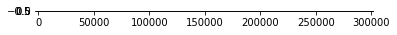

In [30]:
y, x = np.unravel_index(np.argmax(cor), cor.shape) # find the match
print(y)
print(x)
plt.imshow(cor, cmap='gray')

In [40]:
from scipy import signal
from scipy import misc
%matplotlib inline
#lena = misc.lena() - misc.lena().mean()
#template = np.copy(lena[235:295, 310:370]) # right eye
#template -= template.mean()
#lena = lena + np.random.randn(*lena.shape) * 50 # add noise
#corr = signal.correlate2d(lena, template, boundary='symm', mode='same')
y, x = np.unravel_index(np.argmax(cor), cor.shape) # find the match



import matplotlib.pyplot as plt
%matplotlib inline
ax = fig.add_axes([1, 2,1, 1])
#fig, (ax_orig, ax_template, ax_corr) = plt.subplots(1, 3)
#print(fig)
#print(ax_orig)
ax.imshow(im1)
ax.set_title('Original')
ax.set_axis_off()
ax.imshow(im2)
ax.set_title('Template')
ax.set_axis_off()
ax.imshow(cor, cmap='gray')
ax.set_title('Cross-correlation')
ax.set_axis_off()
ax.plot(x, y, 'ro')
fig.show()
plt.show()


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


(159, 317)
[ 8.5  3.9]
[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  1.00011418  0.9999694
   1.0000082 ]
 [ 0.          0.          0.         ...,  1.00000072  0.99999981
   1.00000005]
 [ 0.          0.          0.         ...,  0.9999625   1.00001005
   0.99999731]]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice.
  
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:4269: RuntimeWarning: Invalid value encountered i

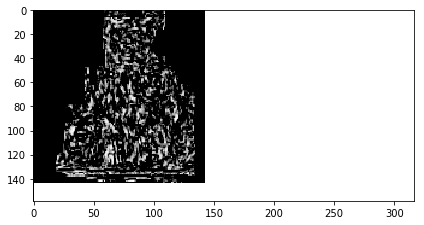

In [77]:
from skimage import io, feature
from scipy import ndimage
import numpy as np

def correlation_coefficient(patch1, patch2):
    product = np.mean((patch1 - patch1.mean()) * (patch2 - patch2.mean()))
    stds = patch1.std() * patch2.std()
    if stds == 0:
        return 0
    else:
        product /= stds
        return product

im = io.imread('test.jpeg', as_grey=True)
print(np.shape(im))
im1 = im[16:263, 4:146]
sh_row, sh_col = im1.shape
im2 = im[16:263, 155:155+sh_col]

# Registration of the two images
translation = feature.register_translation(im1, im2, upsample_factor=10)[0]
print(translation)
im2_register = ndimage.shift(im2, translation)
print(im2_register)
d = 1

correlation = np.zeros_like(im)

for i in range(d, 159):
    for j in range(d, 317):
        correlation[i, j] = correlation_coefficient(im1[i - d: i + d + 1,
                                                        j - d: j + d + 1],
                                                    im2[i - d: i + d + 1,
                                                        j - d: j + d + 1])

io.imshow(correlation, cmap='gray')
io.show()

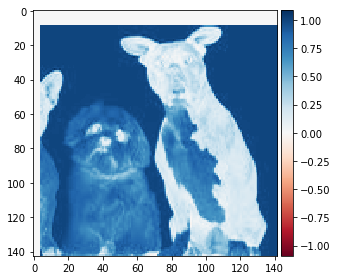

In [78]:
io.imshow(im2_register)

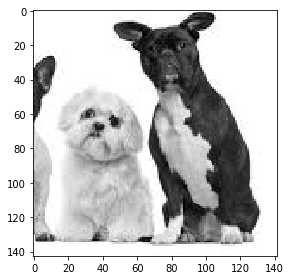

In [47]:
from skimage import io, feature
from scipy import ndimage
import numpy as np

def correlation_coefficient(patch1, patch2):
    product = np.mean((patch1 - patch1.mean()) * (patch2 - patch2.mean()))
    stds = patch1.std() * patch2.std()
    if stds == 0:
        return 0
    else:
        product /= stds
        return product

im = io.imread('test.jpeg', as_grey=True)
print('im:',np.shape(im))

im1 = im[16:263, 4:146]
print('im1:',np.shape(im1))
sh_row, sh_col = im1.shape
im2 = im[16:263, 155:155+sh_col]
print('im2:',np.shape(im2))

# Registration of the two images
translation = feature.register_translation(im1, im2, upsample_factor=10)[0]
im2_register = ndimage.shift(im2, translation)

d = 1

correlation = np.zeros_like(im)

for i in range(d,159):
    for j in range(d,317):
        correlation[i, j] = correlation_coefficient(im[i - d: i + d + 1,
                                                        j - d: j + d + 1],
                                                    im[i - d: i + d + 1,
                                                        j - d: j + d + 1])

io.imshow(correlation, cmap='gray')
io.show()

image size : (303, 384)
coin image size : (50, 55)


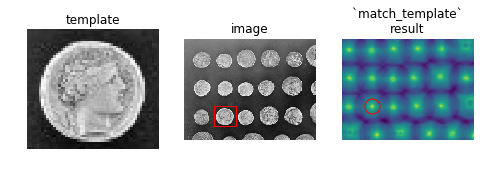

In [94]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.feature import match_template


image = data.coins()
print('image size :',np.shape(image))
coin = image[170:220, 75:130]
print('coin image size :', np.shape(coin))

result = match_template(image, coin)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

#image 나타내기
fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, adjustable='box-forced')
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2, adjustable='box-forced')

ax1.imshow(coin, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = coin.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
# match template 위치 표시
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=15)

plt.show()